Tutorial 1: Individual Models
=============================

In many examples, we fit one model to one dataset. For many problems, we may have a large dataset and are not
interested in how well the model fits each individual dataset. Instead, we want to know how the model fits the full
dataset, so that we can determine "global" trends of how the model fits the data.

These tutorials show you how to compose and fit hierarchical models to large datasets, which fit many individual
models to each dataset. However, all parameters in the model are linked together, enabling global inference of the
model over the full dataset. This can extract a significant amount of extra information from large datasets, which
fitting each dataset individually does not.

Fitting a hierarchical model uses a "graphical model", which is a model that is simultaneously fitted to every
dataset simultaneously. The graph expresses how the parameters of every individual model is paired with each dataset
and how they are linked to every other model parameter. Complex graphical models fitting a diversity of different
datasets and non-trivial model parameter linking is possible and common.

This chapter will start by fitting a simple graphical model to a dataset of noisy 1D Gaussians. The Gaussians all
share the same `centre`, meaning that a graphical model can be composed where there is only a single global `centre`
shared by all Gaussians.

However, before fitting a graphical model, we will first fit each Gaussian individually and combine the inference
on the `centre` after every fit is complete. This will give us an estimate of the `centre` that we can compare to
the result of the graphical model in tutorial 2.

__Real World Example__

Hierarchical models are often used to determine effective drug treatments across a sample of patients distributed over
many hospitals. Trying to do this on each individual hospital dataset is not ideal, as the number of patients in each
hospital is small and the treatment may be more or less effective in some hospitals than others. Hierarchical models
can extract the global trends of how effective the treatment is across the full population of patients.

In healthcare, there may also be many datasets available, with different formats that require slightly different models
to fit them. The high levels of customization possible in model composition and defining the analysis class mean
that fitting diverse datasets with hierarchical models is feasible. This also means that a common problem in healthcare
data, missing data, can be treated in a statistically robust manner.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

from os import path
import numpy as np

import autofit as af
import autofit.plot as aplt

C:\Users\Jammy\Code\PyAuto\precise_observational
Working Directory has been set to `C:\Users\Jammy\Code\PyAuto\precise_observational`


__Example Source Code (`af.ex`)__

The **PyAutoFit** source code has the following example objects (accessed via `af.ex`) used in this tutorial:

 - `Analysis`: an analysis object which fits noisy 1D datasets, including `log_likelihood_function` and 
 `visualize` functions.

 - `Gaussian`: a model component representing a 1D Gaussian profile.

 - `plot_profile_1d`: a function for plotting 1D profile datasets including their noise.

These are functionally identical to the `Analysis`, `Gaussian` and `plot_profile_1d` objects and functions you have 
seen and used elsewhere throughout the workspace.

__Model__

Our model is a single `Gaussian`. 

We put this in a `Collection` so that when we extend the model in later tutorials we use the same API throughout
all tutorials.

In [2]:
model = af.Collection(gaussian=af.ex.Gaussian)

__Data__

We quickly set up the name of each dataset, which is used below for loading the datasets.

The dataset contains 10 Gaussians, but for speed we'll fit just 5. You can change this to 10 to see how the result
changes with more datasets.

In [3]:
total_datasets = 5

dataset_name_list = []

for dataset_index in range(total_datasets):
    dataset_name_list.append(f"dataset_{dataset_index}")

For each 1D Gaussian dataset we now set up the correct path, load it, and plot it. 

Notice how much lower the signal-to-noise is than you are used too, you probably find it difficult to estimate 
the centre of some of the Gaussians by eye!

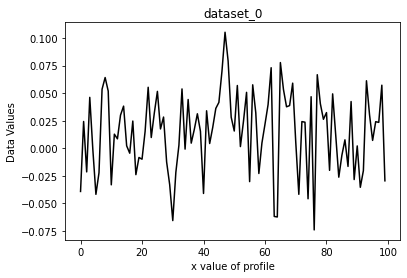

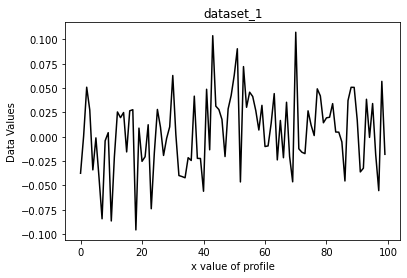

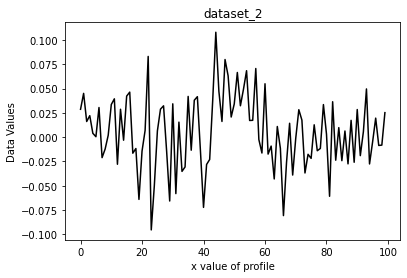

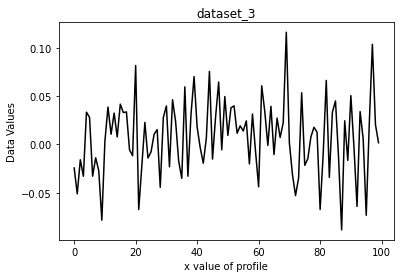

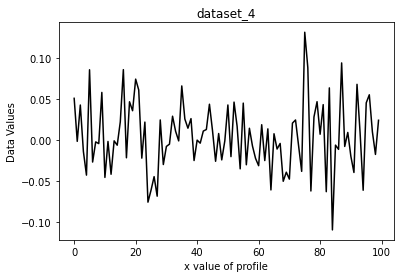

<Figure size 432x288 with 0 Axes>

In [4]:
for dataset_name in dataset_name_list:
    """
    Load the dataset from the `autofit_workspace/dataset` folder.
    """

    dataset_path = path.join(
        "dataset", "example_1d", "gaussian_x1__low_snr", dataset_name
    )

    data = af.util.numpy_array_from_json(file_path=path.join(dataset_path, "data.json"))
    noise_map = af.util.numpy_array_from_json(
        file_path=path.join(dataset_path, "noise_map.json")
    )

    af.ex.plot_profile_1d(
        xvalues=np.arange(data.shape[0]),
        profile_1d=data,
        title=dataset_name,
        ylabel="Data Values",
        color="k",
    )

__Model Fits (one-by-one)__

For every dataset we now create an `Analysis` and fit it with a `Gaussian`.

The `Result` is stored in the list `result_list`.

In [ ]:
result_list = []

for dataset_name in dataset_name_list:
    """
    Load the dataset from the `autofit_workspace/dataset` folder.
    """
    dataset_path = path.join(
        "dataset", "example_1d", "gaussian_x1__low_snr", dataset_name
    )

    data = af.util.numpy_array_from_json(file_path=path.join(dataset_path, "data.json"))
    noise_map = af.util.numpy_array_from_json(
        file_path=path.join(dataset_path, "noise_map.json")
    )

    """
    For each dataset create a corresponding `Analysis` class.
    """
    analysis = af.ex.Analysis(data=data, noise_map=noise_map)

    """
    Create the `DynestyStatic` non-linear search and use it to fit the data.

    We use custom dynesty settings which ensure the posterior is explored fully and that our error estimates are robust.
    """
    dynesty = af.DynestyStatic(
        name="global_model",
        path_prefix=path.join(
            "howtofit", "chapter_graphical_models", "tutorial_1_individual_models"
        ),
        unique_tag=dataset_name,
        nlive=200,
        dlogz=1e-4,
        sample="rwalk",
        walks=10,
    )

    print(
        f"Dynesty has begun running, checkout \n"
        f"autofit_workspace/output/howtofit/chapter_graphical_models/tutorial_1_individual_models/{dataset_name} for live \n"
        f"output of the results. This Jupyter notebook cell with progress once Dynesty has completed, this could take a \n"
        f"few minutes!"
    )

    result_list.append(dynesty.fit(model=model, analysis=analysis))

2023-06-26 12:19:23,675 - autofit.non_linear.abstract_search - INFO - Creating search
Dynesty has begun running, checkout 
autofit_workspace/output/howtofit/chapter_graphica_models/tutorial_1_individual_models/dataset_0 for live 
output of the results. This Jupyter notebook cell with progress once Dynesty has completed, this could take a 
few minutes!
2023-06-26 12:19:23,676 - global_model - INFO - Starting search
2023-06-26 12:19:23,677 - global_model - INFO - Saving path info
2023-06-26 12:19:23,689 - global_model - INFO - Not complete. Starting non-linear search.
2023-06-26 12:19:23,691 - global_model - INFO - No Dynesty samples found, beginning new non-linear search. 
2023-06-26 12:19:23,811 - autofit.non_linear.initializer - INFO - Generating initial samples of model, which are subject to prior limits and other constraints.


251it [00:02, 86.49it/s, +200 | bound: 0 | nc: 1 | ncall: 904 | eff(%): 64.062 | loglstar:   -inf < -40.195 <    inf | logz: -45.367 +/-  0.722 | dlogz:  0.224 >  0.000] 

2023-06-26 12:19:26,918 - global_model - INFO - 500 Iterations: Performing update (Visualization, outputting samples, etc.).



353it [00:02, 152.86it/s, +200 | bound: 0 | nc: 1 | ncall: 1406 | eff(%): 45.854 | loglstar:   -inf < -39.696 <    inf | logz: -45.155 +/-  0.666 | dlogz:  0.183 >  0.000]

2023-06-26 12:19:33,179 - global_model - INFO - 1000 Iterations: Performing update (Visualization, outputting samples, etc.).



429it [00:02, 181.70it/s, +200 | bound: 0 | nc: 1 | ncall: 1916 | eff(%): 36.655 | loglstar:   -inf < -39.696 <    inf | logz: -45.273 +/-  0.610 | dlogz:  0.144 >  0.000]


2023-06-26 12:19:39,264 - global_model - INFO - 1500 Iterations: Performing update (Visualization, outputting samples, etc.).


467it [00:04, 112.17it/s, +200 | bound: 0 | nc: 1 | ncall: 2431 | eff(%): 29.897 | loglstar:   -inf < -39.696 <    inf | logz: -45.169 +/-  0.558 | dlogz:  0.109 >  0.000]

2023-06-26 12:19:48,659 - global_model - INFO - 2000 Iterations: Performing update (Visualization, outputting samples, etc.).



515it [00:03, 132.92it/s, +200 | bound: 0 | nc: 1 | ncall: 3005 | eff(%): 25.490 | loglstar:   -inf < -39.696 <    inf | logz: -45.115 +/-  0.474 | dlogz:  0.083 >  0.000]

2023-06-26 12:19:57,446 - global_model - INFO - 2500 Iterations: Performing update (Visualization, outputting samples, etc.).



536it [00:02, 213.55it/s, +200 | bound: 0 | nc: 1 | ncall: 3587 | eff(%): 21.730 | loglstar:   -inf < -39.696 <    inf | logz: -45.142 +/-  0.459 | dlogz:  0.077 >  0.000]

2023-06-26 12:20:04,475 - global_model - INFO - 3000 Iterations: Performing update (Visualization, outputting samples, etc.).



566it [00:02, 258.92it/s, +200 | bound: 0 | nc: 1 | ncall: 4109 | eff(%): 19.596 | loglstar:   -inf < -39.696 <    inf | logz: -45.209 +/-  0.450 | dlogz:  0.071 >  0.000]

2023-06-26 12:20:10,282 - global_model - INFO - 3500 Iterations: Performing update (Visualization, outputting samples, etc.).



590it [00:02, 270.64it/s, +200 | bound: 0 | nc: 1 | ncall: 4611 | eff(%): 17.910 | loglstar:   -inf < -39.656 <    inf | logz: -45.194 +/-  0.438 | dlogz:  0.065 >  0.000]

2023-06-26 12:20:16,149 - global_model - INFO - 4000 Iterations: Performing update (Visualization, outputting samples, etc.).



615it [00:02, 253.46it/s, +200 | bound: 0 | nc: 1 | ncall: 5113 | eff(%): 16.589 | loglstar:   -inf < -39.656 <    inf | logz: -45.181 +/-  0.411 | dlogz:  0.056 >  0.000]

2023-06-26 12:20:21,942 - global_model - INFO - 4500 Iterations: Performing update (Visualization, outputting samples, etc.).



632it [00:03, 196.45it/s, +200 | bound: 0 | nc: 1 | ncall: 5653 | eff(%): 15.258 | loglstar:   -inf < -39.656 <    inf | logz: -45.210 +/-  0.405 | dlogz:  0.054 >  0.000]

2023-06-26 12:20:29,154 - global_model - INFO - 5000 Iterations: Performing update (Visualization, outputting samples, etc.).



647it [00:03, 209.93it/s, +200 | bound: 0 | nc: 1 | ncall: 6158 | eff(%): 14.216 | loglstar:   -inf < -39.656 <    inf | logz: -45.228 +/-  0.400 | dlogz:  0.051 >  0.000]

2023-06-26 12:20:36,872 - global_model - INFO - 5500 Iterations: Performing update (Visualization, outputting samples, etc.).



663it [00:03, 200.54it/s, +200 | bound: 0 | nc: 1 | ncall: 6669 | eff(%): 13.341 | loglstar:   -inf < -39.656 <    inf | logz: -45.188 +/-  0.382 | dlogz:  0.045 >  0.000]

2023-06-26 12:20:45,065 - global_model - INFO - 6000 Iterations: Performing update (Visualization, outputting samples, etc.).



694it [00:02, 310.79it/s, +200 | bound: 1 | nc: 1 | ncall: 7173 | eff(%): 12.821 | loglstar:   -inf < -39.656 <    inf | logz: -45.146 +/-  0.352 | dlogz:  0.037 >  0.000]

2023-06-26 12:20:54,082 - global_model - INFO - 6500 Iterations: Performing update (Visualization, outputting samples, etc.).



745it [00:02, 330.39it/s, +200 | bound: 3 | nc: 1 | ncall: 7683 | eff(%): 12.629 | loglstar:   -inf < -39.656 <    inf | logz: -45.223 +/-  0.340 | dlogz:  0.031 >  0.000]

2023-06-26 12:20:59,711 - global_model - INFO - 7000 Iterations: Performing update (Visualization, outputting samples, etc.).



796it [00:02, 365.31it/s, +200 | bound: 5 | nc: 1 | ncall: 8193 | eff(%): 12.461 | loglstar:   -inf < -39.656 <    inf | logz: -45.201 +/-  0.306 | dlogz:  0.024 >  0.000]

2023-06-26 12:21:05,550 - global_model - INFO - 7500 Iterations: Performing update (Visualization, outputting samples, etc.).



847it [00:01, 426.24it/s, +200 | bound: 6 | nc: 1 | ncall: 8703 | eff(%): 12.313 | loglstar:   -inf < -39.656 <    inf | logz: -45.178 +/-  0.279 | dlogz:  0.018 >  0.000]

2023-06-26 12:21:11,723 - global_model - INFO - 8000 Iterations: Performing update (Visualization, outputting samples, etc.).



898it [00:02, 385.08it/s, +200 | bound: 8 | nc: 1 | ncall: 9213 | eff(%): 12.182 | loglstar:   -inf < -39.656 <    inf | logz: -45.187 +/-  0.265 | dlogz:  0.014 >  0.000]

2023-06-26 12:21:17,666 - global_model - INFO - 8500 Iterations: Performing update (Visualization, outputting samples, etc.).



949it [00:04, 204.12it/s, +200 | bound: 10 | nc: 1 | ncall: 9723 | eff(%): 12.066 | loglstar:   -inf < -39.656 <    inf | logz: -45.147 +/-  0.246 | dlogz:  0.011 >  0.000]

2023-06-26 12:21:27,831 - global_model - INFO - 9000 Iterations: Performing update (Visualization, outputting samples, etc.).



1000it [00:02, 460.19it/s, +200 | bound: 11 | nc: 1 | ncall: 10233 | eff(%): 11.961 | loglstar:   -inf < -39.656 <    inf | logz: -45.153 +/-  0.237 | dlogz:  0.008 >  0.000]

2023-06-26 12:21:35,447 - global_model - INFO - 9500 Iterations: Performing update (Visualization, outputting samples, etc.).



1051it [00:01, 527.61it/s, +200 | bound: 13 | nc: 1 | ncall: 10743 | eff(%): 11.866 | loglstar:   -inf < -39.622 <    inf | logz: -45.165 +/-  0.228 | dlogz:  0.007 >  0.000]

2023-06-26 12:21:40,871 - global_model - INFO - 10000 Iterations: Performing update (Visualization, outputting samples, etc.).



1102it [00:02, 549.90it/s, +200 | bound: 15 | nc: 1 | ncall: 11253 | eff(%): 11.780 | loglstar:   -inf < -39.622 <    inf | logz: -45.165 +/-  0.216 | dlogz:  0.005 >  0.000]

2023-06-26 12:21:46,337 - global_model - INFO - 10500 Iterations: Performing update (Visualization, outputting samples, etc.).



1153it [00:02, 572.78it/s, +200 | bound: 17 | nc: 1 | ncall: 11763 | eff(%): 11.701 | loglstar:   -inf < -39.622 <    inf | logz: -45.167 +/-  0.203 | dlogz:  0.004 >  0.000]

2023-06-26 12:21:52,891 - global_model - INFO - 11000 Iterations: Performing update (Visualization, outputting samples, etc.).



1204it [00:02, 530.36it/s, +200 | bound: 18 | nc: 1 | ncall: 12273 | eff(%): 11.629 | loglstar:   -inf < -39.622 <    inf | logz: -45.168 +/-  0.190 | dlogz:  0.003 >  0.000]

2023-06-26 12:21:58,778 - global_model - INFO - 11500 Iterations: Performing update (Visualization, outputting samples, etc.).



1255it [00:02, 443.62it/s, +200 | bound: 20 | nc: 1 | ncall: 12783 | eff(%): 11.563 | loglstar:   -inf < -39.622 <    inf | logz: -45.168 +/-  0.177 | dlogz:  0.002 >  0.000]

2023-06-26 12:22:06,290 - global_model - INFO - 12000 Iterations: Performing update (Visualization, outputting samples, etc.).



1306it [00:02, 456.48it/s, +200 | bound: 22 | nc: 1 | ncall: 13293 | eff(%): 11.502 | loglstar:   -inf < -39.622 <    inf | logz: -45.172 +/-  0.165 | dlogz:  0.002 >  0.000]

2023-06-26 12:22:15,319 - global_model - INFO - 12500 Iterations: Performing update (Visualization, outputting samples, etc.).



1357it [00:02, 674.12it/s, +200 | bound: 23 | nc: 1 | ncall: 13803 | eff(%): 11.446 | loglstar:   -inf < -39.622 <    inf | logz: -45.171 +/-  0.157 | dlogz:  0.001 >  0.000]

2023-06-26 12:22:21,977 - global_model - INFO - 13000 Iterations: Performing update (Visualization, outputting samples, etc.).



1408it [00:02, 557.62it/s, +200 | bound: 25 | nc: 1 | ncall: 14313 | eff(%): 11.394 | loglstar:   -inf < -39.622 <    inf | logz: -45.171 +/-  0.150 | dlogz:  0.001 >  0.000]

2023-06-26 12:22:29,069 - global_model - INFO - 13500 Iterations: Performing update (Visualization, outputting samples, etc.).



1459it [00:02, 723.70it/s, +200 | bound: 27 | nc: 1 | ncall: 14823 | eff(%): 11.345 | loglstar:   -inf < -39.622 <    inf | logz: -45.171 +/-  0.145 | dlogz:  0.001 >  0.000]

2023-06-26 12:22:34,864 - global_model - INFO - 14000 Iterations: Performing update (Visualization, outputting samples, etc.).



1510it [00:02, 658.53it/s, +200 | bound: 29 | nc: 1 | ncall: 15333 | eff(%): 11.300 | loglstar:   -inf < -39.622 <    inf | logz: -45.171 +/-  0.142 | dlogz:  0.001 >  0.000]

2023-06-26 12:22:41,573 - global_model - INFO - 14500 Iterations: Performing update (Visualization, outputting samples, etc.).



1561it [00:02, 553.74it/s, +200 | bound: 30 | nc: 1 | ncall: 15843 | eff(%): 11.257 | loglstar:   -inf < -39.620 <    inf | logz: -45.171 +/-  0.141 | dlogz:  0.001 >  0.000]

2023-06-26 12:22:50,382 - global_model - INFO - 15000 Iterations: Performing update (Visualization, outputting samples, etc.).



1612it [00:02, 541.30it/s, +200 | bound: 32 | nc: 1 | ncall: 16353 | eff(%): 11.218 | loglstar:   -inf < -39.618 <    inf | logz: -45.170 +/-  0.140 | dlogz:  0.000 >  0.000]

2023-06-26 12:22:58,312 - global_model - INFO - 15500 Iterations: Performing update (Visualization, outputting samples, etc.).



1663it [00:02, 626.83it/s, +200 | bound: 34 | nc: 1 | ncall: 16863 | eff(%): 11.180 | loglstar:   -inf < -39.618 <    inf | logz: -45.170 +/-  0.140 | dlogz:  0.000 >  0.000]

2023-06-26 12:23:06,634 - global_model - INFO - 16000 Iterations: Performing update (Visualization, outputting samples, etc.).



1714it [00:01, 863.92it/s, +200 | bound: 35 | nc: 1 | ncall: 17373 | eff(%): 11.145 | loglstar:   -inf < -39.618 <    inf | logz: -45.170 +/-  0.140 | dlogz:  0.000 >  0.000]

2023-06-26 12:23:12,410 - global_model - INFO - 16500 Iterations: Performing update (Visualization, outputting samples, etc.).



1765it [00:02, 872.04it/s, +200 | bound: 37 | nc: 1 | ncall: 17883 | eff(%): 11.112 | loglstar:   -inf < -39.618 <    inf | logz: -45.170 +/-  0.140 | dlogz:  0.000 >  0.000]

2023-06-26 12:23:20,065 - global_model - INFO - 17000 Iterations: Performing update (Visualization, outputting samples, etc.).



1816it [00:02, 884.56it/s, +200 | bound: 39 | nc: 1 | ncall: 18393 | eff(%): 11.081 | loglstar:   -inf < -39.613 <    inf | logz: -45.170 +/-  0.140 | dlogz:  0.000 >  0.000]

2023-06-26 12:23:25,848 - global_model - INFO - 17500 Iterations: Performing update (Visualization, outputting samples, etc.).



1867it [00:02, 921.07it/s, +200 | bound: 40 | nc: 1 | ncall: 18903 | eff(%): 11.052 | loglstar:   -inf < -39.613 <    inf | logz: -45.170 +/-  0.140 | dlogz:  0.000 >  0.000]

2023-06-26 12:23:31,591 - global_model - INFO - 18000 Iterations: Performing update (Visualization, outputting samples, etc.).



1918it [00:02, 799.17it/s, +200 | bound: 42 | nc: 1 | ncall: 19413 | eff(%): 11.024 | loglstar:   -inf < -39.613 <    inf | logz: -45.170 +/-  0.141 | dlogz:  0.000 >  0.000]

2023-06-26 12:23:37,752 - global_model - INFO - 18500 Iterations: Performing update (Visualization, outputting samples, etc.).



1969it [00:02, 679.90it/s, +200 | bound: 44 | nc: 1 | ncall: 19923 | eff(%): 10.997 | loglstar:   -inf < -39.613 <    inf | logz: -45.170 +/-  0.141 | dlogz:  0.000 >  0.000]

2023-06-26 12:23:45,695 - global_model - INFO - 19000 Iterations: Performing update (Visualization, outputting samples, etc.).



2020it [00:02, 692.49it/s, +200 | bound: 46 | nc: 1 | ncall: 20433 | eff(%): 10.972 | loglstar:   -inf < -39.613 <    inf | logz: -45.170 +/-  0.141 | dlogz:  0.000 >  0.000]

2023-06-26 12:23:53,647 - global_model - INFO - 19500 Iterations: Performing update (Visualization, outputting samples, etc.).



2071it [00:02, 1026.26it/s, +200 | bound: 47 | nc: 1 | ncall: 20943 | eff(%): 10.948 | loglstar:   -inf < -39.613 <    inf | logz: -45.170 +/-  0.141 | dlogz:  0.000 >  0.000]

2023-06-26 12:24:02,190 - global_model - INFO - 20000 Iterations: Performing update (Visualization, outputting samples, etc.).



2122it [00:02, 907.61it/s, +200 | bound: 49 | nc: 1 | ncall: 21453 | eff(%): 10.926 | loglstar:   -inf < -39.613 <    inf | logz: -45.170 +/-  0.141 | dlogz:  0.000 >  0.000]

2023-06-26 12:24:08,219 - global_model - INFO - 20500 Iterations: Performing update (Visualization, outputting samples, etc.).



2173it [00:02, 954.74it/s, +200 | bound: 51 | nc: 1 | ncall: 21963 | eff(%): 10.904 | loglstar:   -inf < -39.612 <    inf | logz: -45.170 +/-  0.141 | dlogz:  0.000 >  0.000]

2023-06-26 12:24:14,605 - global_model - INFO - 21000 Iterations: Performing update (Visualization, outputting samples, etc.).



2224it [00:02, 821.58it/s, +200 | bound: 52 | nc: 1 | ncall: 22473 | eff(%): 10.883 | loglstar:   -inf < -39.612 <    inf | logz: -45.170 +/-  0.142 | dlogz:  0.000 >  0.000]

2023-06-26 12:24:21,458 - global_model - INFO - 21500 Iterations: Performing update (Visualization, outputting samples, etc.).



2275it [00:02, 775.39it/s, +200 | bound: 54 | nc: 1 | ncall: 22983 | eff(%): 10.863 | loglstar:   -inf < -39.612 <    inf | logz: -45.170 +/-  0.142 | dlogz:  0.000 >  0.000]

2023-06-26 12:24:29,732 - global_model - INFO - 22000 Iterations: Performing update (Visualization, outputting samples, etc.).



2326it [00:02, 785.02it/s, +200 | bound: 56 | nc: 1 | ncall: 23493 | eff(%): 10.844 | loglstar:   -inf < -39.611 <    inf | logz: -45.170 +/-  0.142 | dlogz:  0.000 >  0.000]

2023-06-26 12:24:37,991 - global_model - INFO - 22500 Iterations: Performing update (Visualization, outputting samples, etc.).



2377it [00:02, 956.26it/s, +200 | bound: 57 | nc: 1 | ncall: 24003 | eff(%): 10.826 | loglstar:   -inf < -39.611 <    inf | logz: -45.170 +/-  0.142 | dlogz:  0.000 >  0.000]

2023-06-26 12:24:45,975 - global_model - INFO - 23000 Iterations: Performing update (Visualization, outputting samples, etc.).



2428it [00:02, 1195.47it/s, +200 | bound: 59 | nc: 1 | ncall: 24513 | eff(%): 10.809 | loglstar:   -inf < -39.611 <    inf | logz: -45.170 +/-  0.142 | dlogz:  0.000 >  0.000]

2023-06-26 12:24:55,327 - global_model - INFO - 23500 Iterations: Performing update (Visualization, outputting samples, etc.).



2479it [00:02, 1203.40it/s, +200 | bound: 61 | nc: 1 | ncall: 25023 | eff(%): 10.792 | loglstar:   -inf < -39.611 <    inf | logz: -45.170 +/-  0.142 | dlogz:  0.000 >  0.000]

2023-06-26 12:25:01,128 - global_model - INFO - 24000 Iterations: Performing update (Visualization, outputting samples, etc.).



2530it [00:02, 1217.52it/s, +200 | bound: 63 | nc: 1 | ncall: 25533 | eff(%): 10.776 | loglstar:   -inf < -39.611 <    inf | logz: -45.170 +/-  0.142 | dlogz:  0.000 >  0.000]

2023-06-26 12:25:07,006 - global_model - INFO - 24500 Iterations: Performing update (Visualization, outputting samples, etc.).



2581it [00:04, 631.66it/s, +200 | bound: 64 | nc: 1 | ncall: 26043 | eff(%): 10.761 | loglstar:   -inf < -39.611 <    inf | logz: -45.170 +/-  0.142 | dlogz:  0.000 >  0.000]

2023-06-26 12:25:16,813 - global_model - INFO - 25000 Iterations: Performing update (Visualization, outputting samples, etc.).



2632it [00:03, 847.52it/s, +200 | bound: 66 | nc: 1 | ncall: 26553 | eff(%): 10.746 | loglstar:   -inf < -39.611 <    inf | logz: -45.170 +/-  0.142 | dlogz:  0.000 >  0.000]

2023-06-26 12:25:25,558 - global_model - INFO - 25500 Iterations: Performing update (Visualization, outputting samples, etc.).



2683it [00:02, 1235.84it/s, +200 | bound: 68 | nc: 1 | ncall: 27063 | eff(%): 10.732 | loglstar:   -inf < -39.611 <    inf | logz: -45.170 +/-  0.142 | dlogz:  0.000 >  0.000]

2023-06-26 12:25:33,318 - global_model - INFO - 26000 Iterations: Performing update (Visualization, outputting samples, etc.).



2734it [00:02, 1329.10it/s, +200 | bound: 69 | nc: 1 | ncall: 27573 | eff(%): 10.719 | loglstar:   -inf < -39.611 <    inf | logz: -45.170 +/-  0.142 | dlogz:  0.000 >  0.000]

2023-06-26 12:25:39,292 - global_model - INFO - 26500 Iterations: Performing update (Visualization, outputting samples, etc.).



2785it [00:02, 1358.54it/s, +200 | bound: 71 | nc: 1 | ncall: 28083 | eff(%): 10.705 | loglstar:   -inf < -39.611 <    inf | logz: -45.170 +/-  0.142 | dlogz:  0.000 >  0.000]

2023-06-26 12:25:48,716 - global_model - INFO - 27000 Iterations: Performing update (Visualization, outputting samples, etc.).



2836it [00:02, 1090.34it/s, +200 | bound: 73 | nc: 1 | ncall: 28593 | eff(%): 10.693 | loglstar:   -inf < -39.611 <    inf | logz: -45.170 +/-  0.142 | dlogz:  0.000 >  0.000]

2023-06-26 12:25:56,312 - global_model - INFO - 27500 Iterations: Performing update (Visualization, outputting samples, etc.).



2887it [00:02, 998.27it/s, +200 | bound: 74 | nc: 1 | ncall: 29103 | eff(%): 10.681 | loglstar:   -inf < -39.611 <    inf | logz: -45.170 +/-  0.142 | dlogz:  0.000 >  0.000]


2023-06-26 12:26:04,707 - global_model - INFO - 28000 Iterations: Performing update (Visualization, outputting samples, etc.).


2938it [00:02, 1039.90it/s, +200 | bound: 76 | nc: 1 | ncall: 29613 | eff(%): 10.669 | loglstar:   -inf < -39.611 <    inf | logz: -45.170 +/-  0.142 | dlogz:  0.000 >  0.000]

2023-06-26 12:26:12,818 - global_model - INFO - 28500 Iterations: Performing update (Visualization, outputting samples, etc.).



2962it [00:01, 1573.02it/s, +200 | bound: 77 | nc: 1 | ncall: 29853 | eff(%): 10.663 | loglstar:   -inf < -39.611 <    inf | logz: -45.170 +/-  0.142 | dlogz:  0.000 >  0.000]

2023-06-26 12:26:18,788 - global_model - INFO - 29000 Iterations: Performing update (Visualization, outputting samples, etc.).



2962it [00:00, 41717.41it/s, +200 | bound: 77 | nc: 1 | ncall: 29853 | eff(%): 10.663 | loglstar:   -inf < -39.611 <    inf | logz: -45.170 +/-  0.142 | dlogz:  0.000 >  0.000]

2023-06-26 12:26:23,022 - global_model - INFO - 29500 Iterations: Performing update (Visualization, outputting samples, etc.).


2023-06-26 12:26:27,169 - global_model - INFO - 30000 Iterations: Performing update (Visualization, outputting samples, etc.).
2023-06-26 12:26:31,825 - global_model - INFO - Removing zip file
2023-06-26 12:26:31,897 - autofit.non_linear.abstract_search - INFO - Creating search
Dynesty has begun running, checkout 
autofit_workspace/output/howtofit/chapter_graphica_models/tutorial_1_individual_models/dataset_1 for live 
output of the results. This Jupyter notebook cell with progress once Dynesty has completed, this could take a 
few minutes!
2023-06-26 12:26:31,899 - global_model - INFO - Starting search
2023-06-26 12:26:31,900 - global_model - INFO - Saving path info
2023-06-26 12:26:31,913 - global_model - INFO - Not complete. Starting non-linear search.
2023-06-26 12:26:31,915 - global_model - INFO - No Dynesty samples found, beginning new non-linear search. 
2023-06-26 12:26:32,026 - autofit.non_linear.initializer - INFO - Generating initial samples of model, which are subject to pr

235it [00:02, 100.51it/s, +200 | bound: 0 | nc: 1 | ncall: 904 | eff(%): 61.790 | loglstar:   -inf < -44.284 <    inf | logz: -47.613 +/-  0.324 | dlogz:  0.042 >  0.000]

2023-06-26 12:26:34,561 - global_model - INFO - 500 Iterations: Performing update (Visualization, outputting samples, etc.).



331it [00:04, 81.97it/s, +200 | bound: 0 | nc: 1 | ncall: 1407 | eff(%): 43.993 | loglstar:   -inf < -43.031 <    inf | logz: -47.534 +/-  0.450 | dlogz:  0.083 >  0.000]

2023-06-26 12:26:47,727 - global_model - INFO - 1000 Iterations: Performing update (Visualization, outputting samples, etc.).



389it [00:03, 121.46it/s, +200 | bound: 0 | nc: 1 | ncall: 1909 | eff(%): 34.465 | loglstar:   -inf < -43.031 <    inf | logz: -47.511 +/-  0.424 | dlogz:  0.061 >  0.000]

2023-06-26 12:26:55,863 - global_model - INFO - 1500 Iterations: Performing update (Visualization, outputting samples, etc.).



432it [00:03, 131.05it/s, +200 | bound: 0 | nc: 1 | ncall: 2417 | eff(%): 28.507 | loglstar:   -inf < -43.031 <    inf | logz: -47.526 +/-  0.391 | dlogz:  0.050 >  0.000]


2023-06-26 12:27:06,697 - global_model - INFO - 2000 Iterations: Performing update (Visualization, outputting samples, etc.).


470it [00:02, 204.35it/s, +200 | bound: 0 | nc: 1 | ncall: 2949 | eff(%): 24.372 | loglstar:   -inf < -43.031 <    inf | logz: -47.527 +/-  0.365 | dlogz:  0.042 >  0.000]

2023-06-26 12:27:12,595 - global_model - INFO - 2500 Iterations: Performing update (Visualization, outputting samples, etc.).



506it [00:02, 205.59it/s, +200 | bound: 0 | nc: 1 | ncall: 3487 | eff(%): 21.479 | loglstar:   -inf < -43.031 <    inf | logz: -47.490 +/-  0.367 | dlogz:  0.034 >  0.000]

2023-06-26 12:27:18,468 - global_model - INFO - 3000 Iterations: Performing update (Visualization, outputting samples, etc.).



537it [00:02, 211.83it/s, +200 | bound: 0 | nc: 1 | ncall: 3993 | eff(%): 19.431 | loglstar:   -inf < -43.031 <    inf | logz: -47.490 +/-  0.344 | dlogz:  0.029 >  0.000]


2023-06-26 12:27:24,830 - global_model - INFO - 3500 Iterations: Performing update (Visualization, outputting samples, etc.).


563it [00:02, 215.81it/s, +200 | bound: 0 | nc: 1 | ncall: 4519 | eff(%): 17.666 | loglstar:   -inf < -42.813 <    inf | logz: -47.438 +/-  0.361 | dlogz:  0.030 >  0.000]

2023-06-26 12:27:31,031 - global_model - INFO - 4000 Iterations: Performing update (Visualization, outputting samples, etc.).



583it [00:03, 166.71it/s, +200 | bound: 0 | nc: 1 | ncall: 5077 | eff(%): 16.055 | loglstar:   -inf < -42.813 <    inf | logz: -47.441 +/-  0.348 | dlogz:  0.027 >  0.000]

2023-06-26 12:27:38,793 - global_model - INFO - 4500 Iterations: Performing update (Visualization, outputting samples, etc.).



602it [00:03, 179.76it/s, +200 | bound: 0 | nc: 1 | ncall: 5691 | eff(%): 14.606 | loglstar:   -inf < -42.813 <    inf | logz: -47.439 +/-  0.334 | dlogz:  0.025 >  0.000]

2023-06-26 12:27:46,877 - global_model - INFO - 5000 Iterations: Performing update (Visualization, outputting samples, etc.).



622it [00:02, 256.60it/s, +200 | bound: 0 | nc: 1 | ncall: 6212 | eff(%): 13.673 | loglstar:   -inf < -42.813 <    inf | logz: -47.434 +/-  0.324 | dlogz:  0.022 >  0.000]

2023-06-26 12:27:54,005 - global_model - INFO - 5500 Iterations: Performing update (Visualization, outputting samples, etc.).



639it [00:02, 291.12it/s, +200 | bound: 1 | nc: 1 | ncall: 6718 | eff(%): 12.872 | loglstar:   -inf < -42.813 <    inf | logz: -47.431 +/-  0.316 | dlogz:  0.021 >  0.000]

2023-06-26 12:27:59,601 - global_model - INFO - 6000 Iterations: Performing update (Visualization, outputting samples, etc.).



690it [00:01, 358.44it/s, +200 | bound: 2 | nc: 1 | ncall: 7228 | eff(%): 12.664 | loglstar:   -inf < -42.813 <    inf | logz: -47.459 +/-  0.289 | dlogz:  0.016 >  0.000]

2023-06-26 12:28:09,232 - global_model - INFO - 6500 Iterations: Performing update (Visualization, outputting samples, etc.).



741it [00:01, 377.10it/s, +200 | bound: 4 | nc: 1 | ncall: 7738 | eff(%): 12.483 | loglstar:   -inf < -42.585 <    inf | logz: -47.442 +/-  0.282 | dlogz:  0.016 >  0.000]

2023-06-26 12:28:14,564 - global_model - INFO - 7000 Iterations: Performing update (Visualization, outputting samples, etc.).



792it [00:02, 389.19it/s, +200 | bound: 6 | nc: 1 | ncall: 8248 | eff(%): 12.326 | loglstar:   -inf < -42.585 <    inf | logz: -47.446 +/-  0.253 | dlogz:  0.012 >  0.000]

2023-06-26 12:28:19,975 - global_model - INFO - 7500 Iterations: Performing update (Visualization, outputting samples, etc.).



843it [00:01, 422.34it/s, +200 | bound: 8 | nc: 1 | ncall: 8758 | eff(%): 12.187 | loglstar:   -inf < -42.439 <    inf | logz: -47.433 +/-  0.249 | dlogz:  0.011 >  0.000]

2023-06-26 12:28:25,339 - global_model - INFO - 8000 Iterations: Performing update (Visualization, outputting samples, etc.).



894it [00:02, 337.49it/s, +200 | bound: 9 | nc: 1 | ncall: 9268 | eff(%): 12.064 | loglstar:   -inf < -42.093 <    inf | logz: -47.410 +/-  0.284 | dlogz:  0.012 >  0.000]

2023-06-26 12:28:31,644 - global_model - INFO - 8500 Iterations: Performing update (Visualization, outputting samples, etc.).



945it [00:02, 341.90it/s, +200 | bound: 11 | nc: 1 | ncall: 9778 | eff(%): 11.954 | loglstar:   -inf < -42.093 <    inf | logz: -47.402 +/-  0.265 | dlogz:  0.009 >  0.000]

2023-06-26 12:28:38,875 - global_model - INFO - 9000 Iterations: Performing update (Visualization, outputting samples, etc.).



996it [00:02, 399.04it/s, +200 | bound: 13 | nc: 1 | ncall: 10288 | eff(%): 11.856 | loglstar:   -inf < -42.093 <    inf | logz: -47.410 +/-  0.238 | dlogz:  0.007 >  0.000]

2023-06-26 12:28:45,832 - global_model - INFO - 9500 Iterations: Performing update (Visualization, outputting samples, etc.).



1047it [00:01, 539.96it/s, +200 | bound: 14 | nc: 1 | ncall: 10798 | eff(%): 11.766 | loglstar:   -inf < -42.093 <    inf | logz: -47.413 +/-  0.214 | dlogz:  0.005 >  0.000]

2023-06-26 12:28:51,542 - global_model - INFO - 10000 Iterations: Performing update (Visualization, outputting samples, etc.).



1098it [00:02, 544.91it/s, +200 | bound: 16 | nc: 1 | ncall: 11308 | eff(%): 11.685 | loglstar:   -inf < -42.093 <    inf | logz: -47.408 +/-  0.199 | dlogz:  0.004 >  0.000]

2023-06-26 12:28:56,994 - global_model - INFO - 10500 Iterations: Performing update (Visualization, outputting samples, etc.).



1149it [00:02, 558.85it/s, +200 | bound: 18 | nc: 1 | ncall: 11818 | eff(%): 11.611 | loglstar:   -inf < -42.093 <    inf | logz: -47.402 +/-  0.184 | dlogz:  0.003 >  0.000]

2023-06-26 12:29:02,479 - global_model - INFO - 11000 Iterations: Performing update (Visualization, outputting samples, etc.).



1200it [00:02, 596.42it/s, +200 | bound: 19 | nc: 1 | ncall: 12328 | eff(%): 11.544 | loglstar:   -inf < -42.093 <    inf | logz: -47.402 +/-  0.172 | dlogz:  0.003 >  0.000]

2023-06-26 12:29:07,945 - global_model - INFO - 11500 Iterations: Performing update (Visualization, outputting samples, etc.).



1251it [00:02, 612.63it/s, +200 | bound: 21 | nc: 1 | ncall: 12838 | eff(%): 11.481 | loglstar:   -inf < -42.003 <    inf | logz: -47.401 +/-  0.161 | dlogz:  0.002 >  0.000]

2023-06-26 12:29:13,450 - global_model - INFO - 12000 Iterations: Performing update (Visualization, outputting samples, etc.).



1302it [00:02, 644.24it/s, +200 | bound: 23 | nc: 1 | ncall: 13348 | eff(%): 11.424 | loglstar:   -inf < -42.003 <    inf | logz: -47.399 +/-  0.150 | dlogz:  0.002 >  0.000]


2023-06-26 12:29:18,929 - global_model - INFO - 12500 Iterations: Performing update (Visualization, outputting samples, etc.).


1353it [00:02, 502.79it/s, +200 | bound: 25 | nc: 1 | ncall: 13858 | eff(%): 11.371 | loglstar:   -inf < -42.003 <    inf | logz: -47.400 +/-  0.140 | dlogz:  0.001 >  0.000]

2023-06-26 12:29:30,523 - global_model - INFO - 13000 Iterations: Performing update (Visualization, outputting samples, etc.).



1404it [00:02, 526.63it/s, +200 | bound: 26 | nc: 1 | ncall: 14368 | eff(%): 11.321 | loglstar:   -inf < -42.003 <    inf | logz: -47.400 +/-  0.131 | dlogz:  0.001 >  0.000]

2023-06-26 12:29:37,678 - global_model - INFO - 13500 Iterations: Performing update (Visualization, outputting samples, etc.).



1455it [00:02, 619.68it/s, +200 | bound: 28 | nc: 1 | ncall: 14878 | eff(%): 11.275 | loglstar:   -inf < -42.003 <    inf | logz: -47.398 +/-  0.123 | dlogz:  0.001 >  0.000]

2023-06-26 12:29:44,502 - global_model - INFO - 14000 Iterations: Performing update (Visualization, outputting samples, etc.).



1506it [00:02, 745.54it/s, +200 | bound: 30 | nc: 1 | ncall: 15388 | eff(%): 11.233 | loglstar:   -inf < -41.986 <    inf | logz: -47.398 +/-  0.117 | dlogz:  0.001 >  0.000]


2023-06-26 12:29:50,324 - global_model - INFO - 14500 Iterations: Performing update (Visualization, outputting samples, etc.).


1557it [00:01, 785.17it/s, +200 | bound: 31 | nc: 1 | ncall: 15898 | eff(%): 11.193 | loglstar:   -inf < -41.986 <    inf | logz: -47.399 +/-  0.111 | dlogz:  0.000 >  0.000]

2023-06-26 12:29:55,918 - global_model - INFO - 15000 Iterations: Performing update (Visualization, outputting samples, etc.).



1608it [00:02, 790.57it/s, +200 | bound: 33 | nc: 1 | ncall: 16408 | eff(%): 11.155 | loglstar:   -inf < -41.986 <    inf | logz: -47.400 +/-  0.106 | dlogz:  0.000 >  0.000]

2023-06-26 12:30:01,527 - global_model - INFO - 15500 Iterations: Performing update (Visualization, outputting samples, etc.).



1659it [00:02, 809.66it/s, +200 | bound: 35 | nc: 1 | ncall: 16918 | eff(%): 11.120 | loglstar:   -inf < -41.986 <    inf | logz: -47.400 +/-  0.102 | dlogz:  0.000 >  0.000]

2023-06-26 12:30:07,439 - global_model - INFO - 16000 Iterations: Performing update (Visualization, outputting samples, etc.).



1710it [00:01, 873.34it/s, +200 | bound: 36 | nc: 1 | ncall: 17428 | eff(%): 11.087 | loglstar:   -inf < -41.986 <    inf | logz: -47.400 +/-  0.099 | dlogz:  0.000 >  0.000]

2023-06-26 12:30:12,967 - global_model - INFO - 16500 Iterations: Performing update (Visualization, outputting samples, etc.).



1761it [00:02, 768.66it/s, +200 | bound: 38 | nc: 1 | ncall: 17938 | eff(%): 11.055 | loglstar:   -inf < -41.968 <    inf | logz: -47.400 +/-  0.097 | dlogz:  0.000 >  0.000]

2023-06-26 12:30:18,863 - global_model - INFO - 17000 Iterations: Performing update (Visualization, outputting samples, etc.).



1812it [00:02, 706.98it/s, +200 | bound: 40 | nc: 1 | ncall: 18448 | eff(%): 11.026 | loglstar:   -inf < -41.968 <    inf | logz: -47.400 +/-  0.095 | dlogz:  0.000 >  0.000]

2023-06-26 12:30:25,885 - global_model - INFO - 17500 Iterations: Performing update (Visualization, outputting samples, etc.).



1863it [00:02, 703.01it/s, +200 | bound: 42 | nc: 1 | ncall: 18958 | eff(%): 10.998 | loglstar:   -inf < -41.968 <    inf | logz: -47.400 +/-  0.093 | dlogz:  0.000 >  0.000]

2023-06-26 12:30:33,314 - global_model - INFO - 18000 Iterations: Performing update (Visualization, outputting samples, etc.).



1914it [00:02, 893.13it/s, +200 | bound: 43 | nc: 1 | ncall: 19468 | eff(%): 10.972 | loglstar:   -inf < -41.968 <    inf | logz: -47.400 +/-  0.092 | dlogz:  0.000 >  0.000]

2023-06-26 12:30:40,086 - global_model - INFO - 18500 Iterations: Performing update (Visualization, outputting samples, etc.).



1965it [00:02, 945.62it/s, +200 | bound: 45 | nc: 1 | ncall: 19978 | eff(%): 10.947 | loglstar:   -inf < -41.968 <    inf | logz: -47.400 +/-  0.091 | dlogz:  0.000 >  0.000]

2023-06-26 12:30:45,923 - global_model - INFO - 19000 Iterations: Performing update (Visualization, outputting samples, etc.).



2016it [00:01, 1044.02it/s, +200 | bound: 47 | nc: 1 | ncall: 20488 | eff(%): 10.923 | loglstar:   -inf < -41.968 <    inf | logz: -47.400 +/-  0.090 | dlogz:  0.000 >  0.000]

2023-06-26 12:30:51,627 - global_model - INFO - 19500 Iterations: Performing update (Visualization, outputting samples, etc.).



2067it [00:02, 994.23it/s, +200 | bound: 48 | nc: 1 | ncall: 20998 | eff(%): 10.900 | loglstar:   -inf < -41.968 <    inf | logz: -47.400 +/-  0.090 | dlogz:  0.000 >  0.000]

2023-06-26 12:31:03,425 - global_model - INFO - 20000 Iterations: Performing update (Visualization, outputting samples, etc.).



2118it [00:01, 1080.61it/s, +200 | bound: 50 | nc: 1 | ncall: 21508 | eff(%): 10.879 | loglstar:   -inf < -41.968 <    inf | logz: -47.400 +/-  0.089 | dlogz:  0.000 >  0.000]

2023-06-26 12:31:09,141 - global_model - INFO - 20500 Iterations: Performing update (Visualization, outputting samples, etc.).



2169it [00:01, 1088.31it/s, +200 | bound: 52 | nc: 1 | ncall: 22018 | eff(%): 10.858 | loglstar:   -inf < -41.968 <    inf | logz: -47.400 +/-  0.089 | dlogz:  0.000 >  0.000]

2023-06-26 12:31:14,861 - global_model - INFO - 21000 Iterations: Performing update (Visualization, outputting samples, etc.).



2220it [00:02, 987.97it/s, +200 | bound: 53 | nc: 1 | ncall: 22528 | eff(%): 10.838 | loglstar:   -inf < -41.968 <    inf | logz: -47.400 +/-  0.089 | dlogz:  0.000 >  0.000]

2023-06-26 12:31:20,772 - global_model - INFO - 21500 Iterations: Performing update (Visualization, outputting samples, etc.).



2271it [00:04, 529.27it/s, +200 | bound: 55 | nc: 1 | ncall: 23038 | eff(%): 10.820 | loglstar:   -inf < -41.968 <    inf | logz: -47.400 +/-  0.088 | dlogz:  0.000 >  0.000]


2023-06-26 12:31:29,794 - global_model - INFO - 22000 Iterations: Performing update (Visualization, outputting samples, etc.).


2322it [00:02, 1146.67it/s, +200 | bound: 57 | nc: 1 | ncall: 23548 | eff(%): 10.802 | loglstar:   -inf < -41.968 <    inf | logz: -47.400 +/-  0.088 | dlogz:  0.000 >  0.000]

2023-06-26 12:31:39,392 - global_model - INFO - 22500 Iterations: Performing update (Visualization, outputting samples, etc.).



2373it [00:01, 1234.01it/s, +200 | bound: 59 | nc: 1 | ncall: 24058 | eff(%): 10.785 | loglstar:   -inf < -41.968 <    inf | logz: -47.400 +/-  0.088 | dlogz:  0.000 >  0.000]

2023-06-26 12:31:45,201 - global_model - INFO - 23000 Iterations: Performing update (Visualization, outputting samples, etc.).



2424it [00:02, 1210.79it/s, +200 | bound: 60 | nc: 1 | ncall: 24568 | eff(%): 10.768 | loglstar:   -inf < -41.966 <    inf | logz: -47.400 +/-  0.088 | dlogz:  0.000 >  0.000]

2023-06-26 12:31:51,433 - global_model - INFO - 23500 Iterations: Performing update (Visualization, outputting samples, etc.).



2475it [00:01, 1272.47it/s, +200 | bound: 62 | nc: 1 | ncall: 25078 | eff(%): 10.752 | loglstar:   -inf < -41.966 <    inf | logz: -47.400 +/-  0.088 | dlogz:  0.000 >  0.000]

2023-06-26 12:31:57,134 - global_model - INFO - 24000 Iterations: Performing update (Visualization, outputting samples, etc.).



2526it [00:02, 1179.90it/s, +200 | bound: 64 | nc: 1 | ncall: 25588 | eff(%): 10.737 | loglstar:   -inf < -41.965 <    inf | logz: -47.400 +/-  0.088 | dlogz:  0.000 >  0.000]

2023-06-26 12:32:03,037 - global_model - INFO - 24500 Iterations: Performing update (Visualization, outputting samples, etc.).



2577it [00:02, 1119.44it/s, +200 | bound: 65 | nc: 1 | ncall: 26098 | eff(%): 10.723 | loglstar:   -inf < -41.965 <    inf | logz: -47.400 +/-  0.088 | dlogz:  0.000 >  0.000]

2023-06-26 12:32:09,222 - global_model - INFO - 25000 Iterations: Performing update (Visualization, outputting samples, etc.).



2628it [00:02, 1028.57it/s, +200 | bound: 67 | nc: 1 | ncall: 26608 | eff(%): 10.709 | loglstar:   -inf < -41.965 <    inf | logz: -47.400 +/-  0.088 | dlogz:  0.000 >  0.000]

2023-06-26 12:32:16,680 - global_model - INFO - 25500 Iterations: Performing update (Visualization, outputting samples, etc.).



2679it [00:02, 1098.85it/s, +200 | bound: 69 | nc: 1 | ncall: 27118 | eff(%): 10.695 | loglstar:   -inf < -41.965 <    inf | logz: -47.400 +/-  0.088 | dlogz:  0.000 >  0.000]

2023-06-26 12:32:24,778 - global_model - INFO - 26000 Iterations: Performing update (Visualization, outputting samples, etc.).



2730it [00:02, 1304.35it/s, +200 | bound: 70 | nc: 1 | ncall: 27628 | eff(%): 10.683 | loglstar:   -inf < -41.965 <    inf | logz: -47.400 +/-  0.088 | dlogz:  0.000 >  0.000]

2023-06-26 12:32:30,861 - global_model - INFO - 26500 Iterations: Performing update (Visualization, outputting samples, etc.).



2781it [00:02, 1346.08it/s, +200 | bound: 72 | nc: 1 | ncall: 28138 | eff(%): 10.670 | loglstar:   -inf < -41.965 <    inf | logz: -47.400 +/-  0.088 | dlogz:  0.000 >  0.000]

2023-06-26 12:32:37,117 - global_model - INFO - 27000 Iterations: Performing update (Visualization, outputting samples, etc.).



2832it [00:03, 731.21it/s, +200 | bound: 74 | nc: 1 | ncall: 28648 | eff(%): 10.658 | loglstar:   -inf < -41.965 <    inf | logz: -47.400 +/-  0.088 | dlogz:  0.000 >  0.000]

2023-06-26 12:32:45,159 - global_model - INFO - 27500 Iterations: Performing update (Visualization, outputting samples, etc.).



2883it [00:02, 1111.41it/s, +200 | bound: 76 | nc: 1 | ncall: 29158 | eff(%): 10.646 | loglstar:   -inf < -41.965 <    inf | logz: -47.400 +/-  0.088 | dlogz:  0.000 >  0.000]


2023-06-26 12:33:01,999 - global_model - INFO - 28000 Iterations: Performing update (Visualization, outputting samples, etc.).


2934it [00:03, 874.77it/s, +200 | bound: 77 | nc: 1 | ncall: 29668 | eff(%): 10.635 | loglstar:   -inf < -41.965 <    inf | logz: -47.400 +/-  0.088 | dlogz:  0.000 >  0.000]

2023-06-26 12:33:11,286 - global_model - INFO - 28500 Iterations: Performing update (Visualization, outputting samples, etc.).



2937it [00:02, 1399.88it/s, +200 | bound: 77 | nc: 1 | ncall: 29698 | eff(%): 10.635 | loglstar:   -inf < -41.965 <    inf | logz: -47.400 +/-  0.088 | dlogz:  0.000 >  0.000]

2023-06-26 12:33:17,469 - global_model - INFO - 29000 Iterations: Performing update (Visualization, outputting samples, etc.).



2937it [00:00, 37653.12it/s, +200 | bound: 77 | nc: 1 | ncall: 29698 | eff(%): 10.635 | loglstar:   -inf < -41.965 <    inf | logz: -47.400 +/-  0.088 | dlogz:  0.000 >  0.000]

2023-06-26 12:33:22,220 - global_model - INFO - 29500 Iterations: Performing update (Visualization, outputting samples, etc.).


2023-06-26 12:33:27,160 - global_model - INFO - 30000 Iterations: Performing update (Visualization, outputting samples, etc.).
2023-06-26 12:33:33,743 - global_model - INFO - Removing zip file
2023-06-26 12:33:33,821 - autofit.non_linear.abstract_search - INFO - Creating search
Dynesty has begun running, checkout 
autofit_workspace/output/howtofit/chapter_graphica_models/tutorial_1_individual_models/dataset_2 for live 
output of the results. This Jupyter notebook cell with progress once Dynesty has completed, this could take a 
few minutes!
2023-06-26 12:33:33,822 - global_model - INFO - Starting search
2023-06-26 12:33:33,823 - global_model - INFO - Saving path info
2023-06-26 12:33:33,835 - global_model - INFO - Not complete. Starting non-linear search.
2023-06-26 12:33:33,836 - global_model - INFO - No Dynesty samples found, beginning new non-linear search. 
2023-06-26 12:33:33,958 - autofit.non_linear.initializer - INFO - Generating initial samples of model, which are subject to pr

244it [00:02, 98.58it/s, +200 | bound: 0 | nc: 1 | ncall: 923 | eff(%): 61.411 | loglstar:   -inf < -38.448 <    inf | logz: -44.256 +/-  0.843 | dlogz:  0.399 >  0.000]    

2023-06-26 12:33:36,646 - global_model - INFO - 500 Iterations: Performing update (Visualization, outputting samples, etc.).



354it [00:02, 123.52it/s, +200 | bound: 0 | nc: 1 | ncall: 1435 | eff(%): 44.858 | loglstar:   -inf < -38.448 <    inf | logz: -44.326 +/-  0.734 | dlogz:  0.265 >  0.000]


2023-06-26 12:33:44,226 - global_model - INFO - 1000 Iterations: Performing update (Visualization, outputting samples, etc.).


416it [00:02, 148.94it/s, +200 | bound: 0 | nc: 1 | ncall: 1938 | eff(%): 35.443 | loglstar:   -inf < -38.448 <    inf | logz: -44.239 +/-  0.715 | dlogz:  0.186 >  0.000]

2023-06-26 12:33:50,965 - global_model - INFO - 1500 Iterations: Performing update (Visualization, outputting samples, etc.).



461it [00:02, 162.10it/s, +200 | bound: 0 | nc: 1 | ncall: 2441 | eff(%): 29.496 | loglstar:   -inf < -38.448 <    inf | logz: -44.175 +/-  0.688 | dlogz:  0.143 >  0.000]

2023-06-26 12:33:58,398 - global_model - INFO - 2000 Iterations: Performing update (Visualization, outputting samples, etc.).



499it [00:03, 159.82it/s, +200 | bound: 0 | nc: 1 | ncall: 2947 | eff(%): 25.446 | loglstar:   -inf < -37.314 <    inf | logz: -43.983 +/-  0.957 | dlogz:  0.282 >  0.000]

2023-06-26 12:34:05,740 - global_model - INFO - 2500 Iterations: Performing update (Visualization, outputting samples, etc.).



532it [00:02, 220.08it/s, +200 | bound: 0 | nc: 1 | ncall: 3448 | eff(%): 22.537 | loglstar:   -inf < -35.944 <    inf | logz: -43.465 +/-  1.333 | dlogz:  0.499 >  0.000]

2023-06-26 12:34:12,279 - global_model - INFO - 3000 Iterations: Performing update (Visualization, outputting samples, etc.).



558it [00:02, 224.89it/s, +200 | bound: 0 | nc: 1 | ncall: 4003 | eff(%): 19.932 | loglstar:   -inf < -35.944 <    inf | logz: -43.538 +/-  1.318 | dlogz:  0.477 >  0.000]

2023-06-26 12:34:18,281 - global_model - INFO - 3500 Iterations: Performing update (Visualization, outputting samples, etc.).



582it [00:02, 238.82it/s, +200 | bound: 0 | nc: 1 | ncall: 4510 | eff(%): 18.144 | loglstar:   -inf < -35.944 <    inf | logz: -43.611 +/-  1.303 | dlogz:  0.459 >  0.000]

2023-06-26 12:34:25,269 - global_model - INFO - 4000 Iterations: Performing update (Visualization, outputting samples, etc.).



613it [00:02, 235.41it/s, +200 | bound: 0 | nc: 1 | ncall: 5014 | eff(%): 16.888 | loglstar:   -inf < -35.944 <    inf | logz: -43.642 +/-  1.221 | dlogz:  0.416 >  0.000]

2023-06-26 12:34:33,043 - global_model - INFO - 4500 Iterations: Performing update (Visualization, outputting samples, etc.).



633it [00:02, 241.97it/s, +200 | bound: 0 | nc: 1 | ncall: 5553 | eff(%): 15.561 | loglstar:   -inf < -35.944 <    inf | logz: -43.692 +/-  1.201 | dlogz:  0.399 >  0.000]

2023-06-26 12:34:40,109 - global_model - INFO - 5000 Iterations: Performing update (Visualization, outputting samples, etc.).



649it [00:02, 262.17it/s, +200 | bound: 0 | nc: 1 | ncall: 6095 | eff(%): 14.402 | loglstar:   -inf < -35.944 <    inf | logz: -43.726 +/-  1.179 | dlogz:  0.384 >  0.000]

2023-06-26 12:34:48,336 - global_model - INFO - 5500 Iterations: Performing update (Visualization, outputting samples, etc.).



658it [00:03, 197.06it/s, +200 | bound: 0 | nc: 1 | ncall: 6609 | eff(%): 13.387 | loglstar:   -inf < -35.944 <    inf | logz: -43.747 +/-  1.167 | dlogz:  0.376 >  0.000]

2023-06-26 12:34:55,231 - global_model - INFO - 6000 Iterations: Performing update (Visualization, outputting samples, etc.).



689it [00:02, 295.84it/s, +200 | bound: 1 | nc: 1 | ncall: 7118 | eff(%): 12.851 | loglstar:   -inf < -35.944 <    inf | logz: -43.630 +/-  1.104 | dlogz:  0.299 >  0.000]

2023-06-26 12:35:01,210 - global_model - INFO - 6500 Iterations: Performing update (Visualization, outputting samples, etc.).



740it [00:02, 322.16it/s, +200 | bound: 3 | nc: 1 | ncall: 7628 | eff(%): 12.655 | loglstar:   -inf < -35.944 <    inf | logz: -43.655 +/-  1.010 | dlogz:  0.245 >  0.000]

2023-06-26 12:35:07,020 - global_model - INFO - 7000 Iterations: Performing update (Visualization, outputting samples, etc.).



791it [00:02, 341.09it/s, +200 | bound: 5 | nc: 1 | ncall: 8138 | eff(%): 12.484 | loglstar:   -inf < -35.944 <    inf | logz: -43.633 +/-  0.901 | dlogz:  0.191 >  0.000]

2023-06-26 12:35:13,661 - global_model - INFO - 7500 Iterations: Performing update (Visualization, outputting samples, etc.).



842it [00:02, 287.57it/s, +200 | bound: 6 | nc: 1 | ncall: 8648 | eff(%): 12.334 | loglstar:   -inf < -35.944 <    inf | logz: -43.551 +/-  0.821 | dlogz:  0.140 >  0.000]

2023-06-26 12:35:30,226 - global_model - INFO - 8000 Iterations: Performing update (Visualization, outputting samples, etc.).



893it [00:02, 301.08it/s, +200 | bound: 8 | nc: 1 | ncall: 9158 | eff(%): 12.201 | loglstar:   -inf < -35.944 <    inf | logz: -43.503 +/-  0.792 | dlogz:  0.105 >  0.000]

2023-06-26 12:35:36,963 - global_model - INFO - 8500 Iterations: Performing update (Visualization, outputting samples, etc.).



944it [00:02, 325.40it/s, +200 | bound: 10 | nc: 1 | ncall: 9668 | eff(%): 12.083 | loglstar:   -inf < -35.944 <    inf | logz: -43.528 +/-  0.720 | dlogz:  0.085 >  0.000]

2023-06-26 12:35:44,425 - global_model - INFO - 9000 Iterations: Performing update (Visualization, outputting samples, etc.).



995it [00:02, 467.36it/s, +200 | bound: 11 | nc: 1 | ncall: 10178 | eff(%): 11.976 | loglstar:   -inf < -35.944 <    inf | logz: -43.459 +/-  0.675 | dlogz:  0.062 >  0.000]

2023-06-26 12:35:51,387 - global_model - INFO - 9500 Iterations: Performing update (Visualization, outputting samples, etc.).



1046it [00:02, 444.34it/s, +200 | bound: 13 | nc: 1 | ncall: 10688 | eff(%): 11.880 | loglstar:   -inf < -35.944 <    inf | logz: -43.479 +/-  0.619 | dlogz:  0.049 >  0.000]

2023-06-26 12:35:57,375 - global_model - INFO - 10000 Iterations: Performing update (Visualization, outputting samples, etc.).



1097it [00:02, 503.54it/s, +200 | bound: 15 | nc: 1 | ncall: 11198 | eff(%): 11.793 | loglstar:   -inf < -35.944 <    inf | logz: -43.382 +/-  0.559 | dlogz:  0.035 >  0.000]

2023-06-26 12:36:05,021 - global_model - INFO - 10500 Iterations: Performing update (Visualization, outputting samples, etc.).



1148it [00:02, 523.93it/s, +200 | bound: 17 | nc: 1 | ncall: 11708 | eff(%): 11.714 | loglstar:   -inf < -35.944 <    inf | logz: -43.383 +/-  0.511 | dlogz:  0.027 >  0.000]

2023-06-26 12:36:11,047 - global_model - INFO - 11000 Iterations: Performing update (Visualization, outputting samples, etc.).



1199it [00:02, 472.98it/s, +200 | bound: 18 | nc: 1 | ncall: 12218 | eff(%): 11.641 | loglstar:   -inf < -35.608 <    inf | logz: -43.344 +/-  0.482 | dlogz:  0.028 >  0.000]

2023-06-26 12:36:17,277 - global_model - INFO - 11500 Iterations: Performing update (Visualization, outputting samples, etc.).



1250it [00:02, 485.24it/s, +200 | bound: 20 | nc: 1 | ncall: 12728 | eff(%): 11.574 | loglstar:   -inf < -35.483 <    inf | logz: -43.295 +/-  0.465 | dlogz:  0.024 >  0.000]

2023-06-26 12:36:23,964 - global_model - INFO - 12000 Iterations: Performing update (Visualization, outputting samples, etc.).



1301it [00:02, 522.71it/s, +200 | bound: 22 | nc: 1 | ncall: 13238 | eff(%): 11.513 | loglstar:   -inf < -35.410 <    inf | logz: -43.302 +/-  0.455 | dlogz:  0.020 >  0.000]

2023-06-26 12:36:29,956 - global_model - INFO - 12500 Iterations: Performing update (Visualization, outputting samples, etc.).



1352it [00:02, 625.35it/s, +200 | bound: 23 | nc: 1 | ncall: 13748 | eff(%): 11.456 | loglstar:   -inf < -35.410 <    inf | logz: -43.312 +/-  0.421 | dlogz:  0.016 >  0.000]

2023-06-26 12:36:35,631 - global_model - INFO - 13000 Iterations: Performing update (Visualization, outputting samples, etc.).



1403it [00:02, 640.24it/s, +200 | bound: 25 | nc: 1 | ncall: 14258 | eff(%): 11.403 | loglstar:   -inf < -35.410 <    inf | logz: -43.341 +/-  0.395 | dlogz:  0.013 >  0.000]

2023-06-26 12:36:41,367 - global_model - INFO - 13500 Iterations: Performing update (Visualization, outputting samples, etc.).



1454it [00:02, 574.24it/s, +200 | bound: 27 | nc: 1 | ncall: 14768 | eff(%): 11.354 | loglstar:   -inf < -35.410 <    inf | logz: -43.355 +/-  0.363 | dlogz:  0.010 >  0.000]

2023-06-26 12:36:48,166 - global_model - INFO - 14000 Iterations: Performing update (Visualization, outputting samples, etc.).



1505it [00:03, 444.21it/s, +200 | bound: 28 | nc: 1 | ncall: 15278 | eff(%): 11.308 | loglstar:   -inf < -35.410 <    inf | logz: -43.381 +/-  0.335 | dlogz:  0.008 >  0.000]

2023-06-26 12:36:57,802 - global_model - INFO - 14500 Iterations: Performing update (Visualization, outputting samples, etc.).



1556it [00:03, 480.84it/s, +200 | bound: 30 | nc: 1 | ncall: 15788 | eff(%): 11.265 | loglstar:   -inf < -35.260 <    inf | logz: -43.373 +/-  0.313 | dlogz:  0.007 >  0.000]

2023-06-26 12:37:06,424 - global_model - INFO - 15000 Iterations: Performing update (Visualization, outputting samples, etc.).



1607it [00:02, 790.07it/s, +200 | bound: 32 | nc: 1 | ncall: 16298 | eff(%): 11.225 | loglstar:   -inf < -35.260 <    inf | logz: -43.362 +/-  0.292 | dlogz:  0.005 >  0.000]

2023-06-26 12:37:11,978 - global_model - INFO - 15500 Iterations: Performing update (Visualization, outputting samples, etc.).



1658it [00:02, 804.45it/s, +200 | bound: 34 | nc: 1 | ncall: 16808 | eff(%): 11.187 | loglstar:   -inf < -35.260 <    inf | logz: -43.363 +/-  0.267 | dlogz:  0.004 >  0.000]

2023-06-26 12:37:17,710 - global_model - INFO - 16000 Iterations: Performing update (Visualization, outputting samples, etc.).



1709it [00:02, 796.74it/s, +200 | bound: 35 | nc: 1 | ncall: 17318 | eff(%): 11.152 | loglstar:   -inf < -35.260 <    inf | logz: -43.366 +/-  0.245 | dlogz:  0.003 >  0.000]

2023-06-26 12:37:23,559 - global_model - INFO - 16500 Iterations: Performing update (Visualization, outputting samples, etc.).



1760it [00:02, 692.61it/s, +200 | bound: 37 | nc: 1 | ncall: 17828 | eff(%): 11.119 | loglstar:   -inf < -35.260 <    inf | logz: -43.372 +/-  0.226 | dlogz:  0.003 >  0.000]

2023-06-26 12:37:30,281 - global_model - INFO - 17000 Iterations: Performing update (Visualization, outputting samples, etc.).



1811it [00:02, 749.23it/s, +200 | bound: 39 | nc: 1 | ncall: 18338 | eff(%): 11.087 | loglstar:   -inf < -35.260 <    inf | logz: -43.373 +/-  0.209 | dlogz:  0.002 >  0.000]

2023-06-26 12:37:36,332 - global_model - INFO - 17500 Iterations: Performing update (Visualization, outputting samples, etc.).



1862it [00:02, 695.50it/s, +200 | bound: 40 | nc: 1 | ncall: 18848 | eff(%): 11.057 | loglstar:   -inf < -35.251 <    inf | logz: -43.374 +/-  0.195 | dlogz:  0.002 >  0.000]

2023-06-26 12:37:43,128 - global_model - INFO - 18000 Iterations: Performing update (Visualization, outputting samples, etc.).



1913it [00:03, 505.81it/s, +200 | bound: 42 | nc: 1 | ncall: 19358 | eff(%): 11.029 | loglstar:   -inf < -35.251 <    inf | logz: -43.373 +/-  0.184 | dlogz:  0.001 >  0.000]

2023-06-26 12:37:53,138 - global_model - INFO - 18500 Iterations: Performing update (Visualization, outputting samples, etc.).



1964it [00:02, 859.14it/s, +200 | bound: 44 | nc: 1 | ncall: 19868 | eff(%): 11.003 | loglstar:   -inf < -35.232 <    inf | logz: -43.371 +/-  0.175 | dlogz:  0.001 >  0.000]

2023-06-26 12:38:00,187 - global_model - INFO - 19000 Iterations: Performing update (Visualization, outputting samples, etc.).



2015it [00:02, 781.84it/s, +200 | bound: 45 | nc: 1 | ncall: 20378 | eff(%): 10.977 | loglstar:   -inf < -35.232 <    inf | logz: -43.371 +/-  0.168 | dlogz:  0.001 >  0.000]

2023-06-26 12:38:18,576 - global_model - INFO - 19500 Iterations: Performing update (Visualization, outputting samples, etc.).



2066it [00:02, 979.15it/s, +200 | bound: 47 | nc: 1 | ncall: 20888 | eff(%): 10.953 | loglstar:   -inf < -35.232 <    inf | logz: -43.372 +/-  0.162 | dlogz:  0.001 >  0.000]

2023-06-26 12:38:24,744 - global_model - INFO - 20000 Iterations: Performing update (Visualization, outputting samples, etc.).



2117it [00:02, 1017.28it/s, +200 | bound: 49 | nc: 1 | ncall: 21398 | eff(%): 10.930 | loglstar:   -inf < -35.232 <    inf | logz: -43.372 +/-  0.158 | dlogz:  0.000 >  0.000]

2023-06-26 12:38:31,445 - global_model - INFO - 20500 Iterations: Performing update (Visualization, outputting samples, etc.).



2168it [00:04, 500.78it/s, +200 | bound: 51 | nc: 1 | ncall: 21908 | eff(%): 10.908 | loglstar:   -inf < -35.201 <    inf | logz: -43.371 +/-  0.155 | dlogz:  0.000 >  0.000]

2023-06-26 12:38:39,794 - global_model - INFO - 21000 Iterations: Performing update (Visualization, outputting samples, etc.).



2219it [00:03, 668.77it/s, +200 | bound: 52 | nc: 1 | ncall: 22418 | eff(%): 10.888 | loglstar:   -inf < -35.201 <    inf | logz: -43.371 +/-  0.153 | dlogz:  0.000 >  0.000]

2023-06-26 12:38:49,162 - global_model - INFO - 21500 Iterations: Performing update (Visualization, outputting samples, etc.).



2270it [00:02, 1088.19it/s, +200 | bound: 54 | nc: 1 | ncall: 22928 | eff(%): 10.868 | loglstar:   -inf < -35.200 <    inf | logz: -43.371 +/-  0.151 | dlogz:  0.000 >  0.000]

2023-06-26 12:38:56,406 - global_model - INFO - 22000 Iterations: Performing update (Visualization, outputting samples, etc.).



2321it [00:02, 951.49it/s, +200 | bound: 56 | nc: 1 | ncall: 23438 | eff(%): 10.849 | loglstar:   -inf < -35.200 <    inf | logz: -43.371 +/-  0.149 | dlogz:  0.000 >  0.000]

2023-06-26 12:39:02,920 - global_model - INFO - 22500 Iterations: Performing update (Visualization, outputting samples, etc.).



2372it [00:02, 970.14it/s, +200 | bound: 57 | nc: 1 | ncall: 23948 | eff(%): 10.830 | loglstar:   -inf < -35.200 <    inf | logz: -43.371 +/-  0.148 | dlogz:  0.000 >  0.000]

2023-06-26 12:39:09,779 - global_model - INFO - 23000 Iterations: Performing update (Visualization, outputting samples, etc.).



2423it [00:02, 1150.55it/s, +200 | bound: 59 | nc: 1 | ncall: 24458 | eff(%): 10.813 | loglstar:   -inf < -35.200 <    inf | logz: -43.371 +/-  0.148 | dlogz:  0.000 >  0.000]

2023-06-26 12:39:15,671 - global_model - INFO - 23500 Iterations: Performing update (Visualization, outputting samples, etc.).



2474it [00:02, 971.72it/s, +200 | bound: 61 | nc: 1 | ncall: 24968 | eff(%): 10.796 | loglstar:   -inf < -35.200 <    inf | logz: -43.371 +/-  0.147 | dlogz:  0.000 >  0.000]

2023-06-26 12:39:22,045 - global_model - INFO - 24000 Iterations: Performing update (Visualization, outputting samples, etc.).



2525it [00:02, 957.83it/s, +200 | bound: 62 | nc: 1 | ncall: 25478 | eff(%): 10.780 | loglstar:   -inf < -35.200 <    inf | logz: -43.371 +/-  0.147 | dlogz:  0.000 >  0.000]

2023-06-26 12:39:29,846 - global_model - INFO - 24500 Iterations: Performing update (Visualization, outputting samples, etc.).



2576it [00:02, 970.24it/s, +200 | bound: 64 | nc: 1 | ncall: 25988 | eff(%): 10.765 | loglstar:   -inf < -35.200 <    inf | logz: -43.371 +/-  0.146 | dlogz:  0.000 >  0.000]

2023-06-26 12:39:37,229 - global_model - INFO - 25000 Iterations: Performing update (Visualization, outputting samples, etc.).



2627it [00:03, 875.32it/s, +200 | bound: 66 | nc: 1 | ncall: 26498 | eff(%): 10.750 | loglstar:   -inf < -35.200 <    inf | logz: -43.371 +/-  0.146 | dlogz:  0.000 >  0.000]

2023-06-26 12:39:45,642 - global_model - INFO - 25500 Iterations: Performing update (Visualization, outputting samples, etc.).



2678it [00:02, 1304.94it/s, +200 | bound: 68 | nc: 1 | ncall: 27008 | eff(%): 10.736 | loglstar:   -inf < -35.200 <    inf | logz: -43.371 +/-  0.146 | dlogz:  0.000 >  0.000]

2023-06-26 12:39:51,958 - global_model - INFO - 26000 Iterations: Performing update (Visualization, outputting samples, etc.).



2729it [00:02, 1317.06it/s, +200 | bound: 69 | nc: 1 | ncall: 27518 | eff(%): 10.722 | loglstar:   -inf < -35.200 <    inf | logz: -43.371 +/-  0.146 | dlogz:  0.000 >  0.000]

2023-06-26 12:39:58,243 - global_model - INFO - 26500 Iterations: Performing update (Visualization, outputting samples, etc.).



2780it [00:02, 1316.29it/s, +200 | bound: 71 | nc: 1 | ncall: 28028 | eff(%): 10.709 | loglstar:   -inf < -35.200 <    inf | logz: -43.371 +/-  0.146 | dlogz:  0.000 >  0.000]

2023-06-26 12:40:04,652 - global_model - INFO - 27000 Iterations: Performing update (Visualization, outputting samples, etc.).



2831it [00:02, 1108.88it/s, +200 | bound: 73 | nc: 1 | ncall: 28538 | eff(%): 10.696 | loglstar:   -inf < -35.200 <    inf | logz: -43.371 +/-  0.145 | dlogz:  0.000 >  0.000]

2023-06-26 12:40:11,320 - global_model - INFO - 27500 Iterations: Performing update (Visualization, outputting samples, etc.).



2882it [00:02, 1043.46it/s, +200 | bound: 74 | nc: 1 | ncall: 29048 | eff(%): 10.684 | loglstar:   -inf < -35.200 <    inf | logz: -43.371 +/-  0.145 | dlogz:  0.000 >  0.000]

2023-06-26 12:40:18,141 - global_model - INFO - 28000 Iterations: Performing update (Visualization, outputting samples, etc.).



2933it [00:03, 876.03it/s, +200 | bound: 76 | nc: 1 | ncall: 29558 | eff(%): 10.672 | loglstar:   -inf < -35.200 <    inf | logz: -43.371 +/-  0.145 | dlogz:  0.000 >  0.000]

2023-06-26 12:40:27,041 - global_model - INFO - 28500 Iterations: Performing update (Visualization, outputting samples, etc.).



2984it [00:02, 1259.60it/s, +200 | bound: 78 | nc: 1 | ncall: 30068 | eff(%): 10.660 | loglstar:   -inf < -35.200 <    inf | logz: -43.371 +/-  0.145 | dlogz:  0.000 >  0.000]

2023-06-26 12:40:37,316 - global_model - INFO - 29000 Iterations: Performing update (Visualization, outputting samples, etc.).



3035it [00:01, 1526.64it/s, +200 | bound: 79 | nc: 1 | ncall: 30578 | eff(%): 10.649 | loglstar:   -inf < -35.200 <    inf | logz: -43.371 +/-  0.145 | dlogz:  0.000 >  0.000]

2023-06-26 12:40:43,234 - global_model - INFO - 29500 Iterations: Performing update (Visualization, outputting samples, etc.).



3086it [00:02, 1456.34it/s, +200 | bound: 81 | nc: 1 | ncall: 31088 | eff(%): 10.638 | loglstar:   -inf < -35.200 <    inf | logz: -43.371 +/-  0.145 | dlogz:  0.000 >  0.000]

2023-06-26 12:40:49,266 - global_model - INFO - 30000 Iterations: Performing update (Visualization, outputting samples, etc.).



3137it [00:02, 1528.75it/s, +200 | bound: 83 | nc: 1 | ncall: 31598 | eff(%): 10.628 | loglstar:   -inf < -35.199 <    inf | logz: -43.371 +/-  0.145 | dlogz:  0.000 >  0.000]

2023-06-26 12:40:56,015 - global_model - INFO - 30500 Iterations: Performing update (Visualization, outputting samples, etc.).



3188it [00:02, 1553.61it/s, +200 | bound: 85 | nc: 1 | ncall: 32108 | eff(%): 10.618 | loglstar:   -inf < -35.199 <    inf | logz: -43.371 +/-  0.145 | dlogz:  0.000 >  0.000]

2023-06-26 12:41:01,980 - global_model - INFO - 31000 Iterations: Performing update (Visualization, outputting samples, etc.).



3239it [00:04, 800.42it/s, +200 | bound: 86 | nc: 1 | ncall: 32618 | eff(%): 10.608 | loglstar:   -inf < -35.199 <    inf | logz: -43.371 +/-  0.145 | dlogz:  0.000 >  0.000]

2023-06-26 12:41:11,031 - global_model - INFO - 31500 Iterations: Performing update (Visualization, outputting samples, etc.).



3290it [00:02, 1168.31it/s, +200 | bound: 88 | nc: 1 | ncall: 33128 | eff(%): 10.599 | loglstar:   -inf < -35.199 <    inf | logz: -43.371 +/-  0.145 | dlogz:  0.000 >  0.000]

2023-06-26 12:41:20,971 - global_model - INFO - 32000 Iterations: Performing update (Visualization, outputting samples, etc.).



3341it [00:02, 1588.68it/s, +200 | bound: 90 | nc: 1 | ncall: 33638 | eff(%): 10.590 | loglstar:   -inf < -35.199 <    inf | logz: -43.371 +/-  0.145 | dlogz:  0.000 >  0.000]

2023-06-26 12:41:40,492 - global_model - INFO - 32500 Iterations: Performing update (Visualization, outputting samples, etc.).



3392it [00:01, 1702.81it/s, +200 | bound: 91 | nc: 1 | ncall: 34148 | eff(%): 10.581 | loglstar:   -inf < -35.199 <    inf | logz: -43.371 +/-  0.145 | dlogz:  0.000 >  0.000]

2023-06-26 12:41:46,424 - global_model - INFO - 33000 Iterations: Performing update (Visualization, outputting samples, etc.).



3443it [00:02, 1636.38it/s, +200 | bound: 93 | nc: 1 | ncall: 34658 | eff(%): 10.572 | loglstar:   -inf < -35.199 <    inf | logz: -43.371 +/-  0.145 | dlogz:  0.000 >  0.000]

2023-06-26 12:41:52,464 - global_model - INFO - 33500 Iterations: Performing update (Visualization, outputting samples, etc.).



3486it [00:01, 1824.18it/s, +200 | bound: 94 | nc: 1 | ncall: 35088 | eff(%): 10.565 | loglstar:   -inf < -35.199 <    inf | logz: -43.371 +/-  0.145 | dlogz:  0.000 >  0.000]

2023-06-26 12:41:58,503 - global_model - INFO - 34000 Iterations: Performing update (Visualization, outputting samples, etc.).



3486it [00:00, 43576.99it/s, +200 | bound: 94 | nc: 1 | ncall: 35088 | eff(%): 10.565 | loglstar:   -inf < -35.199 <    inf | logz: -43.371 +/-  0.145 | dlogz:  0.000 >  0.000]

2023-06-26 12:42:02,526 - global_model - INFO - 34500 Iterations: Performing update (Visualization, outputting samples, etc.).


2023-06-26 12:42:06,329 - global_model - INFO - 35000 Iterations: Performing update (Visualization, outputting samples, etc.).
2023-06-26 12:42:11,566 - global_model - INFO - Removing zip file
2023-06-26 12:42:11,643 - autofit.non_linear.abstract_search - INFO - Creating search
Dynesty has begun running, checkout 
autofit_workspace/output/howtofit/chapter_graphica_models/tutorial_1_individual_models/dataset_3 for live 
output of the results. This Jupyter notebook cell with progress once Dynesty has completed, this could take a 
few minutes!
2023-06-26 12:42:11,644 - global_model - INFO - Starting search
2023-06-26 12:42:11,645 - global_model - INFO - Saving path info
2023-06-26 12:42:11,654 - global_model - INFO - Not complete. Starting non-linear search.
2023-06-26 12:42:11,656 - global_model - INFO - No Dynesty samples found, beginning new non-linear search. 
2023-06-26 12:42:11,753 - autofit.non_linear.initializer - INFO - Generating initial samples of model, which are subject to pr

253it [00:02, 123.96it/s, +200 | bound: 0 | nc: 1 | ncall: 904 | eff(%): 64.347 | loglstar:   -inf < -44.818 <    inf | logz: -48.425 +/-  0.305 | dlogz:  0.051 >  0.000]

2023-06-26 12:42:13,981 - global_model - INFO - 500 Iterations: Performing update (Visualization, outputting samples, etc.).



342it [00:02, 133.75it/s, +200 | bound: 0 | nc: 1 | ncall: 1419 | eff(%): 44.463 | loglstar:   -inf < -44.818 <    inf | logz: -48.436 +/-  0.333 | dlogz:  0.033 >  0.000]

2023-06-26 12:42:20,245 - global_model - INFO - 1000 Iterations: Performing update (Visualization, outputting samples, etc.).



413it [00:03, 136.98it/s, +200 | bound: 0 | nc: 1 | ncall: 1934 | eff(%): 35.352 | loglstar:   -inf < -44.398 <    inf | logz: -48.413 +/-  0.328 | dlogz:  0.035 >  0.000]

2023-06-26 12:42:27,945 - global_model - INFO - 1500 Iterations: Performing update (Visualization, outputting samples, etc.).



471it [00:02, 162.02it/s, +200 | bound: 0 | nc: 1 | ncall: 2470 | eff(%): 29.559 | loglstar:   -inf < -44.398 <    inf | logz: -48.371 +/-  0.327 | dlogz:  0.025 >  0.000]

2023-06-26 12:42:34,835 - global_model - INFO - 2000 Iterations: Performing update (Visualization, outputting samples, etc.).



513it [00:02, 212.67it/s, +200 | bound: 0 | nc: 1 | ncall: 2973 | eff(%): 25.712 | loglstar:   -inf < -44.398 <    inf | logz: -48.363 +/-  0.313 | dlogz:  0.020 >  0.000]

2023-06-26 12:42:41,692 - global_model - INFO - 2500 Iterations: Performing update (Visualization, outputting samples, etc.).



551it [00:02, 235.37it/s, +200 | bound: 0 | nc: 1 | ncall: 3485 | eff(%): 22.861 | loglstar:   -inf < -44.398 <    inf | logz: -48.309 +/-  0.292 | dlogz:  0.016 >  0.000]

2023-06-26 12:42:47,588 - global_model - INFO - 3000 Iterations: Performing update (Visualization, outputting samples, etc.).



589it [00:02, 259.93it/s, +200 | bound: 0 | nc: 1 | ncall: 3986 | eff(%): 20.840 | loglstar:   -inf < -44.398 <    inf | logz: -48.326 +/-  0.272 | dlogz:  0.013 >  0.000]

2023-06-26 12:42:53,219 - global_model - INFO - 3500 Iterations: Performing update (Visualization, outputting samples, etc.).



609it [00:02, 263.62it/s, +200 | bound: 0 | nc: 1 | ncall: 4524 | eff(%): 18.710 | loglstar:   -inf < -44.398 <    inf | logz: -48.328 +/-  0.261 | dlogz:  0.012 >  0.000]

2023-06-26 12:42:58,955 - global_model - INFO - 4000 Iterations: Performing update (Visualization, outputting samples, etc.).



628it [00:02, 294.28it/s, +200 | bound: 0 | nc: 1 | ncall: 5033 | eff(%): 17.132 | loglstar:   -inf < -44.398 <    inf | logz: -48.333 +/-  0.252 | dlogz:  0.011 >  0.000]

2023-06-26 12:43:04,397 - global_model - INFO - 4500 Iterations: Performing update (Visualization, outputting samples, etc.).



646it [00:02, 295.92it/s, +200 | bound: 0 | nc: 1 | ncall: 5537 | eff(%): 15.852 | loglstar:   -inf < -44.398 <    inf | logz: -48.331 +/-  0.242 | dlogz:  0.010 >  0.000]

2023-06-26 12:43:09,946 - global_model - INFO - 5000 Iterations: Performing update (Visualization, outputting samples, etc.).



667it [00:02, 225.95it/s, +200 | bound: 0 | nc: 1 | ncall: 6080 | eff(%): 14.745 | loglstar:   -inf < -44.398 <    inf | logz: -48.330 +/-  0.234 | dlogz:  0.009 >  0.000]

2023-06-26 12:43:18,006 - global_model - INFO - 5500 Iterations: Performing update (Visualization, outputting samples, etc.).



682it [00:03, 217.81it/s, +200 | bound: 0 | nc: 1 | ncall: 6594 | eff(%): 13.794 | loglstar:   -inf < -44.398 <    inf | logz: -48.323 +/-  0.231 | dlogz:  0.008 >  0.000]

2023-06-26 12:43:25,745 - global_model - INFO - 6000 Iterations: Performing update (Visualization, outputting samples, etc.).



694it [00:02, 292.21it/s, +200 | bound: 0 | nc: 1 | ncall: 7125 | eff(%): 12.910 | loglstar:   -inf < -44.398 <    inf | logz: -48.316 +/-  0.226 | dlogz:  0.008 >  0.000]

2023-06-26 12:43:31,807 - global_model - INFO - 6500 Iterations: Performing update (Visualization, outputting samples, etc.).



736it [00:02, 365.26it/s, +200 | bound: 2 | nc: 1 | ncall: 7634 | eff(%): 12.591 | loglstar:   -inf < -44.398 <    inf | logz: -48.311 +/-  0.208 | dlogz:  0.006 >  0.000]

2023-06-26 12:43:37,330 - global_model - INFO - 7000 Iterations: Performing update (Visualization, outputting samples, etc.).



787it [00:01, 406.93it/s, +200 | bound: 3 | nc: 1 | ncall: 8144 | eff(%): 12.424 | loglstar:   -inf < -44.398 <    inf | logz: -48.324 +/-  0.189 | dlogz:  0.005 >  0.000]

2023-06-26 12:43:42,695 - global_model - INFO - 7500 Iterations: Performing update (Visualization, outputting samples, etc.).



838it [00:01, 437.14it/s, +200 | bound: 5 | nc: 1 | ncall: 8654 | eff(%): 12.278 | loglstar:   -inf < -44.398 <    inf | logz: -48.311 +/-  0.174 | dlogz:  0.004 >  0.000]

2023-06-26 12:43:48,153 - global_model - INFO - 8000 Iterations: Performing update (Visualization, outputting samples, etc.).



889it [00:01, 465.19it/s, +200 | bound: 7 | nc: 1 | ncall: 9164 | eff(%): 12.149 | loglstar:   -inf < -44.398 <    inf | logz: -48.315 +/-  0.158 | dlogz:  0.003 >  0.000]

2023-06-26 12:43:53,653 - global_model - INFO - 8500 Iterations: Performing update (Visualization, outputting samples, etc.).



940it [00:01, 501.33it/s, +200 | bound: 8 | nc: 1 | ncall: 9674 | eff(%): 12.033 | loglstar:   -inf < -44.398 <    inf | logz: -48.318 +/-  0.145 | dlogz:  0.002 >  0.000]

2023-06-26 12:43:58,929 - global_model - INFO - 9000 Iterations: Performing update (Visualization, outputting samples, etc.).



991it [00:01, 499.25it/s, +200 | bound: 10 | nc: 1 | ncall: 10184 | eff(%): 11.929 | loglstar:   -inf < -44.355 <    inf | logz: -48.320 +/-  0.133 | dlogz:  0.002 >  0.000]

2023-06-26 12:44:04,226 - global_model - INFO - 9500 Iterations: Performing update (Visualization, outputting samples, etc.).



1042it [00:01, 535.46it/s, +200 | bound: 12 | nc: 1 | ncall: 10694 | eff(%): 11.835 | loglstar:   -inf < -44.355 <    inf | logz: -48.319 +/-  0.123 | dlogz:  0.001 >  0.000]

2023-06-26 12:44:09,557 - global_model - INFO - 10000 Iterations: Performing update (Visualization, outputting samples, etc.).



1093it [00:02, 506.95it/s, +200 | bound: 14 | nc: 1 | ncall: 11204 | eff(%): 11.750 | loglstar:   -inf < -44.355 <    inf | logz: -48.318 +/-  0.115 | dlogz:  0.001 >  0.000]

2023-06-26 12:44:15,111 - global_model - INFO - 10500 Iterations: Performing update (Visualization, outputting samples, etc.).



1144it [00:02, 420.43it/s, +200 | bound: 15 | nc: 1 | ncall: 11714 | eff(%): 11.673 | loglstar:   -inf < -44.355 <    inf | logz: -48.317 +/-  0.107 | dlogz:  0.001 >  0.000]

2023-06-26 12:44:21,527 - global_model - INFO - 11000 Iterations: Performing update (Visualization, outputting samples, etc.).



1195it [00:02, 452.65it/s, +200 | bound: 17 | nc: 1 | ncall: 12224 | eff(%): 11.602 | loglstar:   -inf < -44.318 <    inf | logz: -48.317 +/-  0.101 | dlogz:  0.001 >  0.000]

2023-06-26 12:44:30,400 - global_model - INFO - 11500 Iterations: Performing update (Visualization, outputting samples, etc.).



1246it [00:01, 647.61it/s, +200 | bound: 19 | nc: 1 | ncall: 12734 | eff(%): 11.537 | loglstar:   -inf < -44.318 <    inf | logz: -48.317 +/-  0.096 | dlogz:  0.001 >  0.000]

2023-06-26 12:44:36,177 - global_model - INFO - 12000 Iterations: Performing update (Visualization, outputting samples, etc.).



1297it [00:01, 693.95it/s, +200 | bound: 20 | nc: 1 | ncall: 13244 | eff(%): 11.477 | loglstar:   -inf < -44.315 <    inf | logz: -48.316 +/-  0.092 | dlogz:  0.000 >  0.000]

2023-06-26 12:44:41,481 - global_model - INFO - 12500 Iterations: Performing update (Visualization, outputting samples, etc.).



1348it [00:01, 692.65it/s, +200 | bound: 22 | nc: 1 | ncall: 13754 | eff(%): 11.421 | loglstar:   -inf < -44.315 <    inf | logz: -48.317 +/-  0.088 | dlogz:  0.000 >  0.000]

2023-06-26 12:45:00,372 - global_model - INFO - 13000 Iterations: Performing update (Visualization, outputting samples, etc.).



1399it [00:03, 357.14it/s, +200 | bound: 24 | nc: 1 | ncall: 14264 | eff(%): 11.369 | loglstar:   -inf < -44.315 <    inf | logz: -48.317 +/-  0.085 | dlogz:  0.000 >  0.000]


2023-06-26 12:45:07,903 - global_model - INFO - 13500 Iterations: Performing update (Visualization, outputting samples, etc.).


1450it [00:02, 706.63it/s, +200 | bound: 25 | nc: 1 | ncall: 14774 | eff(%): 11.322 | loglstar:   -inf < -44.315 <    inf | logz: -48.317 +/-  0.083 | dlogz:  0.000 >  0.000]

2023-06-26 12:45:15,317 - global_model - INFO - 14000 Iterations: Performing update (Visualization, outputting samples, etc.).



1501it [00:01, 806.56it/s, +200 | bound: 27 | nc: 1 | ncall: 15284 | eff(%): 11.277 | loglstar:   -inf < -44.315 <    inf | logz: -48.317 +/-  0.082 | dlogz:  0.000 >  0.000]

2023-06-26 12:45:20,918 - global_model - INFO - 14500 Iterations: Performing update (Visualization, outputting samples, etc.).



1552it [00:01, 794.69it/s, +200 | bound: 29 | nc: 1 | ncall: 15794 | eff(%): 11.235 | loglstar:   -inf < -44.310 <    inf | logz: -48.317 +/-  0.081 | dlogz:  0.000 >  0.000]

2023-06-26 12:45:26,317 - global_model - INFO - 15000 Iterations: Performing update (Visualization, outputting samples, etc.).



1603it [00:02, 778.53it/s, +200 | bound: 31 | nc: 1 | ncall: 16304 | eff(%): 11.196 | loglstar:   -inf < -44.310 <    inf | logz: -48.317 +/-  0.080 | dlogz:  0.000 >  0.000]


2023-06-26 12:45:31,948 - global_model - INFO - 15500 Iterations: Performing update (Visualization, outputting samples, etc.).
2023-06-26 12:45:33,538 - root - ERROR - Internal Python error in the inspect module.
Below is the traceback from this internal error.

Traceback (most recent call last):
  File "C:\Users\Jammy\anaconda3\envs\PyAuto\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-7ae57045511e>", line 45, in <module>
    result_list.append(dynesty.fit(model=model, analysis=analysis))
  File "C:\Users\Jammy\Code\PyAuto\PyAutoFit\autofit\non_linear\abstract_search.py", line 613, in fit
    self._fit(
  File "C:\Users\Jammy\Code\PyAuto\PyAutoFit\autofit\non_linear\nest\dynesty\abstract.py", line 210, in _fit
    self.perform_update(model=model, analysis=analysis, during_analysis=True)
  File "C:\Users\Jammy\Code\PyAuto\PyAutoFit\autofit\non_linear\abstract_search.py", line 797

<Figure size 432x288 with 0 Axes>

__Results__

Checkout the output folder, you should see five new sets of results corresponding to our Gaussian datasets.

In the `model.results` file of each fit, it will be clear that the `centre` value of every fit (and the other 
parameters) have much larger errors than other **PyAutoFit** examples due to the low signal to noise of the data.

The `result_list` allows us to plot the median PDF value and 3.0 confidence intervals of the `centre` estimate from
the model-fit to each dataset.

In [ ]:
import matplotlib.pyplot as plt

samples_list = [result.samples for result in result_list]

mp_instances = [samps.median_pdf() for samps in samples_list]
ue3_instances = [samp.errors_at_upper_sigma(sigma=3.0) for samp in samples_list]
le3_instances = [samp.errors_at_lower_sigma(sigma=3.0) for samp in samples_list]

mp_centres = [instance.gaussian.centre for instance in mp_instances]
ue3_centres = [instance.gaussian.centre for instance in ue3_instances]
le3_centres = [instance.gaussian.centre for instance in le3_instances]

plt.errorbar(
    x=[f"Gaussian {index}" for index in range(total_datasets)],
    y=mp_centres,
    marker=".",
    linestyle="",
    yerr=[le3_centres, ue3_centres],
)
plt.xticks(rotation=90)
plt.show()
plt.close()

These model-fits are consistent with a range of `centre` values. 

We can show this by plotting the 1D and 2D PDF's of each model fit

In [ ]:

for samples in samples_list:
    search_plotter = aplt.DynestyPlotter(samples=samples)
    search_plotter.cornerplot()

We can also print the values of each centre estimate, including their estimates at 3.0 sigma.

Note that above we used the samples to estimate the size of the errors on the parameters. Below, we use the samples to 
get the value of the parameter at these sigma confidence intervals.

In [ ]:
u1_instances = [samp.values_at_upper_sigma(sigma=1.0) for samp in samples_list]
l1_instances = [samp.values_at_lower_sigma(sigma=1.0) for samp in samples_list]

u1_centres = [instance.gaussian.centre for instance in u1_instances]
l1_centres = [instance.gaussian.centre for instance in l1_instances]

u3_instances = [samp.values_at_upper_sigma(sigma=3.0) for samp in samples_list]
l3_instances = [samp.values_at_lower_sigma(sigma=3.0) for samp in samples_list]

u3_centres = [instance.gaussian.centre for instance in u3_instances]
l3_centres = [instance.gaussian.centre for instance in l3_instances]

for index in range(total_datasets):
    print(f"Centre estimate of Gaussian dataset {index}:\n")
    print(
        f"{mp_centres[index]} ({l1_centres[index]} {u1_centres[index]}) [1.0 sigma confidence interval]"
    )
    print(
        f"{mp_centres[index]} ({l3_centres[index]} {u3_centres[index]}) [3.0 sigma confidence interval] \n"
    )

__Estimating the Centre__

So how might we estimate our global `centre` value? 

A simple approach takes the weighted average of the value inferred by all five fits above.

In [ ]:
ue1_instances = [samp.values_at_upper_sigma(sigma=1.0) for samp in samples_list]
le1_instances = [samp.values_at_lower_sigma(sigma=1.0) for samp in samples_list]

ue1_centres = [instance.gaussian.centre for instance in ue1_instances]
le1_centres = [instance.gaussian.centre for instance in le1_instances]

error_list = [ue1 - le1 for ue1, le1 in zip(ue1_centres, le1_centres)]

values = np.asarray(mp_centres)
sigmas = np.asarray(error_list)

weights = 1 / sigmas ** 2.0
weight_averaged = np.sum(1.0 / sigmas ** 2)

weighted_centre = np.sum(values * weights) / np.sum(weights, axis=0)
weighted_error = 1.0 / np.sqrt(weight_averaged)

print(
    f"Weighted Average Centre Estimate = {weighted_centre} ({weighted_error}) [1.0 sigma confidence intervals]"
)

__Posterior Multiplication__

An alternative and more accurate way to combine each individual inferred centre is multiply their posteriors together.

In order to do this, a smooth 1D profile must be fit to the posteriors via a Kernel Density Estimator (KDE).

[There is currently no support for posterior multiplication and an example illustrating this is currently missing 
from this tutorial. However, I will discuss KDE multiplication throughout these tutorials to give the reader context 
for how this approach to parameter estimation compares to graphical models.]

__Wrap Up__

Lets wrap up the tutorial. The methods used above combine the results of different fits and estimate a global 
value of `centre` alongside estimates of its error. 

In this tutorial, we fitted just 5 datasets. Of course, we could easily fit more datasets, and we would find that
as we added more datasets our estimate of the global centre would become more precise.

In the next tutorial, we will compare this result to one inferred via a graphical model. 

Tutorial 2: Graphical Models
============================

We have fitted a dataset containing 5 noisy 1D Gaussian which had a shared `centre` value. We estimated
the `centre` by fitting each dataset individually and combining the value of the `centre` inferred by each fit into
an overall estimate, using a weighted average.

Graphical models use a different approach. They are a single model that is fitted to the entire dataset simultaneously. 
The model includes specific model component for every individual 1D Gaussian in the sample. However, the graphical 
model also has shared parameters between these individual model components.

This example fits a graphical model using the same sample fitted in the previous tutorial, consisting of many 1D 
Gaussians. However, whereas previously the `centre` of each Gaussian was a free parameter in each fit, in the graphical 
model there is only a single parameter for the `centre` shared by all 1D Gaussians.

This graphical model creates a non-linear parameter space with parameters for every Gaussian in our sample. For 5
Gaussians each with their own model parameters but a single shared centre:

 - Each Gaussian has 2 free parameters from the components that are not shared (`normalization`, `sigma`).
 - There is one additional free parameter, which is the `centre` shared by all 5 Gaussians.

In [ ]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import numpy as np
from os import path

import autofit as af

__Example Source Code (`af.ex`)__

The **PyAutoFit** source code has the following example objects (accessed via `af.ex`) used in this tutorial:

 - `Analysis`: an analysis object which fits noisy 1D datasets, including `log_likelihood_function` and 
 `visualize` functions.

 - `Gaussian`: a model component representing a 1D Gaussian profile.

 - `plot_profile_1d`: a function for plotting 1D profile datasets including their noise.

These are functionally identical to the `Analysis`, `Gaussian` and `plot_profile_1d` objects and functions you 
have seen and used elsewhere throughout the workspace.

__Dataset__

For each dataset we now set up the correct path and load it. 

Whereas in the previous tutorial we fitted each dataset one-by-one, in this tutorial we instead store each dataset 
in a list so that we can set up a single model-fit that fits the 5 datasets simultaneously.

In [ ]:
total_datasets = 5

dataset_name_list = []
data_list = []
noise_map_list = []

for dataset_index in range(total_datasets):
    dataset_name = f"dataset_{dataset_index}"

    dataset_path = path.join(
        "dataset", "example_1d", "gaussian_x1__low_snr", dataset_name
    )

    data = af.util.numpy_array_from_json(file_path=path.join(dataset_path, "data.json"))
    noise_map = af.util.numpy_array_from_json(
        file_path=path.join(dataset_path, "noise_map.json")
    )

    dataset_name_list.append(dataset_name)
    data_list.append(data)
    noise_map_list.append(noise_map)

By plotting the Gaussians we can remind ourselves that determining their centres by eye is difficult.

In [ ]:
for dataset_name, data in zip(dataset_name_list, data_list):
    af.ex.plot_profile_1d(
        xvalues=np.arange(data.shape[0]),
        profile_1d=data,
        title=dataset_name,
        ylabel="Data Values",
        color="k",
    )

__Analysis__

For each dataset we now create a corresponding `Analysis` class. 

In [ ]:
analysis_list = []

for data, noise_map in zip(data_list, noise_map_list):
    analysis = af.ex.Analysis(data=data, noise_map=noise_map)

    analysis_list.append(analysis)

__Model__

We now compose the graphical model that we fit, using the `Model` object you are now familiar with.

We begin by setting up a shared prior for `centre`. 

We set up this up as a single `GaussianPrior` which is passed to separate `Model`'s for each `Gaussian` below.

In [ ]:
centre_shared_prior = af.UniformPrior(lower_limit=0.0, upper_limit=100.0)

We now set up a list of `Model`'s, each of which contain a `Gaussian` that is used to fit each of the datasets 
loaded above.

All of these models use the `centre_shared_prior`, meaning that all model-components use the same value of `centre` 
for every individual model component. 

For a fit using five Gaussians, this reduces the dimensionality of parameter space from N=15 (e.g. 3 parameters per 
Gaussian) to N=11 (e.g. 5 `sigma`'s 5 `normalizations` and 1 `centre`).

In [ ]:
model_list = []

for model_index in range(len(data_list)):
    gaussian = af.Model(af.ex.Gaussian)

    gaussian.centre = centre_shared_prior  # This prior is used by all 3 Gaussians!
    gaussian.normalization = af.LogUniformPrior(lower_limit=1e-6, upper_limit=1e6)
    gaussian.sigma = af.UniformPrior(lower_limit=0.0, upper_limit=25.0)

    model_list.append(gaussian)

__Analysis Factors__

Above, we composed a model consisting of three `Gaussian`'s with a shared `centre` prior. We also loaded three datasets
which we intend to fit with each of these `Gaussians`, setting up each in an `Analysis` class that defines how the 
model is used to fit the data.

We now simply pair each model-component to each `Analysis` class, so that:

- `gaussian_0` fits `data_0` via `analysis_0`.
- `gaussian_1` fits `data_1` via `analysis_1`.
- `gaussian_2` fits `data_2` via `analysis_2`.

The point where a `Model` and `Analysis` class meet is called an `AnalysisFactor`. 

This term denotes that we are composing a graphical model, which is commonly called a 'factor graph'. A  factor 
defines a node on this graph where we have some data, a model, and we fit the two together. The 'links' between these 
different nodes then define the global model we are fitting.

In [ ]:
analysis_factor_list = []

for model, analysis in zip(model_list, analysis_list):
    analysis_factor = af.AnalysisFactor(prior_model=model, analysis=analysis)

    analysis_factor_list.append(analysis_factor)

__Factor Graph__

We now combine our `AnalysisFactor`'s to compose a factor graph.

What is a factor graph? A factor graph defines the graphical model's graph. For example, it defines the different 
model components that make up our model (e.g. the individual `Gaussian` classes) and how their parameters are linked or 
shared (e.g. that each `Gaussian` has its own unique `normalization` and `sigma`, but a shared `centre` parameter).

This is what our factor graph looks like (visualization of graphs not implemented yet): 

The factor graph above is made up of two components:

- Nodes: these are points on the graph where we have a unique set of data and a model that is made up of a subset of 
our overall graphical model. This is effectively the `AnalysisFactor` objects we created above. 

- Links: these define the model components and parameters that are shared across different nodes and thus retain the 
same values when fitting different datasets.

In [ ]:
factor_graph = af.FactorGraphModel(*analysis_factor_list)

The fit will use the factor graph's `global_prior_model`, which uses the models contained in every analysis factor 
to contrast the overall global model that is fitted.

Printing the `info` attribute of this model reveals the overall structure of the model, which is grouped in terms
of the analysis factors and therefore datasets.

In [ ]:
print(factor_graph.global_prior_model.info)

__Search__

We can now create a non-linear search and use it to the fit the factor graph, using its `global_prior_model` property.

In [ ]:
search = af.DynestyStatic(
    path_prefix=path.join("howtofit", "chapter_graphical_models"),
    name="tutorial_2_graphical_model",
    nlive=200,
    dlogz=1e-4,
    sample="rwalk",
    walks=10,
)

result = search.fit(model=factor_graph.global_prior_model, analysis=factor_graph)

__Result__

The result's `info` attribute shows that the result is expressed following the same struture of analysis factors
that the `global_prior_model.info` attribute revealed above.

In [ ]:
print(result.info)

We can now inspect the inferred value of `centre`, and compare this to the value we estimated in the previous tutorial
via a weighted average or posterior multiplicaition using KDE.(feature missing currently). 

(The errors of the weighted average and KDE below is what was estimated for a run on my PC, yours may be slightly 
different!)

In [ ]:
print(
    f"Weighted Average Centre Estimate = 48.535531422571886 (4.139907734505303) [1.0 sigma confidence intervals] \n"
)

centre = result.samples.median_pdf()[0].centre

u1_error = result.samples.values_at_upper_sigma(sigma=1.0)[0].centre
l1_error = result.samples.values_at_lower_sigma(sigma=1.0)[0].centre

u3_error = result.samples.values_at_upper_sigma(sigma=3.0)[0].centre
l3_error = result.samples.values_at_lower_sigma(sigma=3.0)[0].centre

print("Inferred value of the shared centre via a graphical model fit: \n")
print(f"{centre} ({l1_error} {u1_error}) [1.0 sigma confidence intervals]")
print(f"{centre} ({l3_error} {u3_error}) [3.0 sigma confidence intervals]")

The graphical model's centre estimate and errors are pretty much exactly the same as the weighted average or KDE!

Whats the point of fitting a graphical model if the much simpler approach of the previous tutorial gives the
same answer? 

The answer, is model complexity. Graphical models become more powerful as we make our model more complex,
our non-linear parameter space higher dimensionality and the degeneracies between different parameters on the graph
more significant. 

We will demonstrate this in the next tutorial.

__Wrap Up__

In this tutorial, we showed that for our extremely simple model the graphical model gives pretty much the
same estimate of the 1D Gaussian centre's as simpler approaches followed in the previous tutorial. 

We will next show the strengths of graphical models by fitting more complex models.

Tutorial 3: Graphical Benefits
==============================

In the previous tutorials, we fitted a dataset containing 5 noisy 1D Gaussian which had a shared `centre` value and
compared different approaches to estimate the shared `centre`. This included a simple approach fitting each dataset
one-by-one and estimating the centre via a weighted average or posterior multiplication and a more complicated
approach using a graphical model.

The estimates were consistent with one another, making it hard to justify the use of the more complicated graphical
model. However, the model fitted in the previous tutorial was extremely simple, and by making it slightly more complex
we will show the benefits of the graphical model.

__The Model__

In this tutorial, each dataset now contains two Gaussians, and they all have the same shared centres, located at
pixels 40 and 60.

In [ ]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import numpy as np
from os import path

import autofit as af
import autofit.plot as aplt

__Example Source Code (`af.ex`)__

The **PyAutoFit** source code has the following example objects (accessed via `af.ex`) used in this tutorial:

 - `Analysis`: an analysis object which fits noisy 1D datasets, including `log_likelihood_function` and 
 `visualize` functions.

 - `Gaussian`: a model component representing a 1D Gaussian profile.

 - `plot_profile_1d`: a function for plotting 1D profile datasets including their noise.

These are functionally identical to the `Analysis`, `Gaussian` and `plot_profile_1d` objects and functions you have seen 
and used elsewhere throughout the workspace.

__Dataset__

For each dataset we now set up the correct path and load it. 

Note that we are loading a new dataset called `gaussian_x2__offset_centres`.

In [ ]:
total_datasets = 5

dataset_name_list = []
data_list = []
noise_map_list = []

for dataset_index in range(total_datasets):
    dataset_name = f"dataset_{dataset_index}"

    dataset_path = path.join(
        "dataset", "example_1d", "gaussian_x2__offset_centres", dataset_name
    )

    data = af.util.numpy_array_from_json(file_path=path.join(dataset_path, "data.json"))
    noise_map = af.util.numpy_array_from_json(
        file_path=path.join(dataset_path, "noise_map.json")
    )

    dataset_name_list.append(dataset_name)
    data_list.append(data)
    noise_map_list.append(noise_map)

By plotting the datasets we see that each dataset contains two Gaussians. 

Their centres are offset from one another and not located at pixel 50, like in the previous tutorials. 

As discussed above, the Gaussians in every dataset are in facted centred at pixels 40 and 60.

In [ ]:
for dataset_name, data in zip(dataset_name_list, data_list):
    af.ex.plot_profile_1d(
        xvalues=np.arange(data.shape[0]),
        profile_1d=data,
        title=dataset_name,
        ylabel="Data Values",
        color="k",
    )

__Analysis__

For each dataset we now create a corresponding `Analysis` class. 

In [ ]:
analysis_list = []

for data, noise_map in zip(data_list, noise_map_list):
    analysis = af.ex.Analysis(data=data, noise_map=noise_map)

    analysis_list.append(analysis)

__Model (one-by-one)__

We are first going to fit each dataset one by one.

Our model therefore now has two 1D `Gaussian`'s.

To remove solutions where the Gaussians flip locations and fit the other Gaussian, we set uniform priors on the
`centre`'s which ensures one Gaussian stays on the left side of the data (fitting the Gaussian at pixel 40) 
whilst the other stays on the right (fitting the Gaussian at pixel 60).

In [ ]:
gaussian_0 = af.Model(af.ex.Gaussian)

gaussian_0.centre = af.UniformPrior(lower_limit=0.0, upper_limit=50.0)

gaussian_1 = af.Model(af.ex.Gaussian)

gaussian_1.centre = af.UniformPrior(lower_limit=50.0, upper_limit=100.0)

model = af.Collection(gaussian_0=gaussian_0, gaussian_1=gaussian_1)

__Model Fits (one-by-one)__

For every dataset we now create an `Analysis` and fit it with a `Gaussian`.

The `Result` is stored in the list `result_list`.

In [ ]:
result_list = []

for i, analysis in enumerate(analysis_list):
    """
    Create the `DynestyStatic` non-linear search and use it to fit the data.

    We use custom dynesty settings which ensure the posterior is explored fully and that our error estimates are robust.
    """
    search = af.DynestyStatic(
        name=f"individual_fit_{i}",
        path_prefix=path.join(
            "howtofit", "chapter_graphical_models", "tutorial_3_graphical_benefits"
        ),
        nlive=200,
        dlogz=1e-4,
        sample="rwalk",
        walks=10,
    )

    print(
        f"Dynesty has begun running, checkout \n"
        f"autofit_workspace/output/howtofit/chapter_graphical_models/tutorial_3_graphical_benefits/{dataset_name} for live \n"
        f"output of the results. This Jupyter notebook cell with progress once Dynesty has completed, this could take a \n"
        f"few minutes!"
    )

    result_list.append(search.fit(model=model, analysis=analysis))

__Centre Estimates (Weighted Average)__

We can now compute the centre estimate of both Gaussians, including their errors, from the individual model fits
performed above.

In [ ]:
samples_list = [result.samples for result in result_list]

mp_instances = [samps.median_pdf() for samps in samples_list]

mp_centres_0 = [instance.gaussian_0.centre for instance in mp_instances]
mp_centres_1 = [instance.gaussian_1.centre for instance in mp_instances]

ue1_instances = [samp.values_at_upper_sigma(sigma=1.0) for samp in samples_list]
le1_instances = [samp.values_at_lower_sigma(sigma=1.0) for samp in samples_list]

ue1_centres_0 = [instance.gaussian_0.centre for instance in ue1_instances]
le1_centres_0 = [instance.gaussian_0.centre for instance in le1_instances]

error_0_list = [ue1 - le1 for ue1, le1 in zip(ue1_centres_0, le1_centres_0)]

values_0 = np.asarray(mp_centres_0)
sigmas_0 = np.asarray(error_0_list)

weights_0 = 1 / sigmas_0 ** 2.0
weight_averaged_0 = np.sum(1.0 / sigmas_0 ** 2)

weighted_centre_0 = np.sum(values_0 * weights_0) / np.sum(weights_0, axis=0)
weighted_error_0 = 1.0 / np.sqrt(weight_averaged_0)

ue1_centres_1 = [instance.gaussian_1.centre for instance in ue1_instances]
le1_centres_1 = [instance.gaussian_1.centre for instance in le1_instances]

error_1_list = [ue1 - le1 for ue1, le1 in zip(ue1_centres_1, le1_centres_1)]

values_1 = np.asarray(mp_centres_1)
sigmas_1 = np.asarray(error_1_list)

weights_1 = 1 / sigmas_1 ** 2.0
weight_averaged_1 = np.sum(1.0 / sigmas_1 ** 2)

weighted_centre_1 = np.sum(values_1 * weights_1) / np.sum(weights_1, axis=0)
weighted_error_1 = 1.0 / np.sqrt(weight_averaged_1)

print(
    f"Centre 0 via Weighted Average: {weighted_centre_0} ({weighted_error_0}) [1.0 sigma confidence intervals]"
)
print(
    f"Centre 1 via Weighted Average: {weighted_centre_1} ({weighted_error_1}) [1.0 sigma confidence intervals]"
)

The estimate of the centres is not accurate, with both estimates well offset from the input values of 40 and 60.

We will next show that the graphical model offers a notable improvement, but first lets consider why this
approach is suboptimal.

The most important difference between this model and the model fitted in the previous tutorial is that there are now
two shared parameters we are trying to estimate, which are degenerate with one another.

We can see this by inspecting the probability distribution function (PDF) of the fit, placing particular focus on the 
2D degeneracy between the Gaussians centres. 

In [ ]:
search_plotter = aplt.DynestyPlotter(samples=result_list[0].samples)
search_plotter.cornerplot()

The problem is that the simple approach of taking a weighted average does not capture the curved banana-like shape
of the PDF between the two centres. This leads to significant error over estimation and biased inferences on the centre.

__Discussion__

Let us now consider other downsides of fitting each dataset one-by-one, from a statistical perspective. We 
will contrast these to the graphical model later in the tutorial:

1) By fitting each dataset one-by-one this means that each model-fit fails to fully exploit the information we know 
about the global model. We know that there are only two single shared values of `centre` across the full dataset 
that we want to estimate. However, each individual fit has its own `centre` value which is able to assume different 
values than the `centre` values used to fit the other datasets. This means that large degeneracies between the two 
centres are present in each model-fit.

By not fitting our model as a global model, we do not maximize the amount of information that we can extract from the 
dataset as a whole. If a model fits dataset 1 poorly, this should be reflected in how we interpret how well the model 
fits datasets 2 and 3. Our non-linear search should have a global view of how well the model fits the whole dataset. 
This is the crucial aspect of fitting each dataset individually that we miss, and what a graphical model addresses.

2) When we combined the result to estimate the global `centre` value via a weighted average, we marginalized over 
the samples in 1D. As showed above, when there are strong degeneracies between models parameters the information on 
the covariance between these parameters is lost when computing the global `centre`. This increases the inferred 
uncertainties. A graphical model performs no such 1D marginalization and therefore fully samples the
parameter covariances.

3) In Bayesian inference it is important that we define priors on all of the model parameters. By estimating the 
global `centre` after the model-fits are completed it is unclear what prior the global `centre` actually has! We
actually defined the prior five times -- once for each fit -- which is not a well defined prior. In a graphical model 
the prior is clearly defined.

What would have happened if we had estimate the shared centres via 2D posterior multiplication using a KDE? We
will discuss this at the end of the tutorial after fitting a graphical model.

__Model (Graphical)__

We now compose a graphical model and fit it.

Our model now consists of two Gaussians with two `centre_shared_prior` variables, such that the same centres are
used for each Gaussians across all datasets. 

We again restrict one Gaussian's centre between pixels 0 -> 50 and the other 50 -> 100 to remove solutions where
the Gaussians flip location.

In [ ]:
centre_0_shared_prior = af.UniformPrior(lower_limit=0.0, upper_limit=50.0)
centre_1_shared_prior = af.UniformPrior(lower_limit=50.0, upper_limit=100.0)

We now set up a list of `Model`'s, each of which contain two `Gaussian`'s that are used to fit each of the datasets 
loaded above.

All of these `Model`'s use the `centre_shared_prior`'s abpve. This means all model-components use the same value 
of `centre` for every model composed and fitted. 

For a fit to five datasets (each using two Gaussians), this reduces the dimensionality of parameter space 
from N=30 (e.g. 6 parameters per pair of Gaussians) to N=22 (e.g. 10 `sigma`'s 10 `normalizations` and 2 `centre`'s).

In [ ]:
model_list = []

for model_index in range(len(data_list)):
    gaussian_0 = af.Model(af.ex.Gaussian)
    gaussian_1 = af.Model(af.ex.Gaussian)

    gaussian_0.centre = centre_0_shared_prior  # This prior is used by all Gaussians!
    gaussian_1.centre = centre_1_shared_prior  # This prior is used by all Gaussians!

    model = af.Collection(gaussian_0=gaussian_0, gaussian_1=gaussian_1)

    model_list.append(model)

__Analysis Factors__

We again create the graphical model using `AnalysisFactor` objects.

In [ ]:
analysis_factor_list = []

for model, analysis in zip(model_list, analysis_list):
    analysis_factor = af.AnalysisFactor(prior_model=model, analysis=analysis)

    analysis_factor_list.append(analysis_factor)

__Factor Graph__

The analysis factors are then used to create the factor graph.

In [ ]:
factor_graph = af.FactorGraphModel(*analysis_factor_list)

The factor graph model can again be printed via the `info` attribute, which shows that there are two shared
parameters across the datasets.

In [ ]:
print(factor_graph.global_prior_model.info)

__Search__

We can now create a non-linear search and use it to the fit the factor graph, again using its `global_prior_model` 
property.

In [ ]:
search = af.DynestyStatic(
    path_prefix=path.join("howtofit", "chapter_graphical_models"),
    name="tutorial_3_graphical_benefits",
    sample="rwalk",
)

result = search.fit(model=factor_graph.global_prior_model, analysis=factor_graph)

__Result__

The result's `info` attribute shows that the result is expressed following the same structure of analysis factors
that the `global_prior_model.info` attribute revealed above.

In [ ]:
print(result.info)

We can now inspect the inferred `centre` values and compare this to the values estimated above via a weighted average.  

(The errors of the weighted average is what was estimated for a run on my PC, yours may be slightly different!)

In [ ]:
centre_0 = result.samples.median_pdf()[0].gaussian_0.centre

u1_error_0 = result.samples.values_at_upper_sigma(sigma=1.0)[0].gaussian_0.centre
l1_error_0 = result.samples.values_at_lower_sigma(sigma=1.0)[0].gaussian_0.centre

u3_error_0 = result.samples.values_at_upper_sigma(sigma=3.0)[0].gaussian_0.centre
l3_error_0 = result.samples.values_at_lower_sigma(sigma=3.0)[0].gaussian_0.centre

centre_1 = result.samples.median_pdf()[0].gaussian_1.centre

u1_error_1 = result.samples.values_at_upper_sigma(sigma=1.0)[0].gaussian_1.centre
l1_error_1 = result.samples.values_at_lower_sigma(sigma=1.0)[0].gaussian_1.centre

u3_error_1 = result.samples.values_at_upper_sigma(sigma=3.0)[0].gaussian_1.centre
l3_error_1 = result.samples.values_at_lower_sigma(sigma=3.0)[0].gaussian_1.centre

print(
    f"Centre 0 via Weighted Average: 29.415828686393333 (15.265325182888517) [1.0 sigma confidence intervals] \n"
)
print(
    f"Centre 1 via Weighted Average: 54.13825075629124 (2.3460686758693234) [1.0 sigma confidence intervals] \n"
)

print(
    f"Inferred value of Gaussian 0's shared centre via a graphical fit to {total_datasets} datasets: \n"
)
print(
    f"{centre_0} ({l1_error_0} {u1_error_0}) ({u1_error_0 - l1_error_0}) [1.0 sigma confidence intervals]"
)
print(
    f"{centre_0} ({l3_error_0} {u3_error_0}) ({u3_error_0 - l3_error_0}) [3.0 sigma confidence intervals]"
)

print(
    f"Inferred value of Gaussian 1's shared centre via a graphical fit to {total_datasets} datasets: \n"
)
print(
    f"{centre_1} ({l1_error_1} {u1_error_1}) ({u1_error_1 - l1_error_1}) [1.0 sigma confidence intervals]"
)
print(
    f"{centre_1} ({l3_error_1} {u3_error_1}) ({u3_error_1 - l3_error_1}) [3.0 sigma confidence intervals]"
)

As expected, using a graphical model allows us to infer a more precise and accurate model.

__Discussion__

Unlike a fit to each dataset one-by-one, the graphical model:

1) Infers a PDF on the global centre that fully accounts for the degeneracies between the models fitted to different 
datasets. This reduces significantly the large 2D degeneracies between the two centres we saw when inspecting the PDFs 
of each individual fit.

2) Fully exploits the information we know about the global model, for example that the centre of every Gaussian in every 
dataset is aligned. Now, the fit of the Gaussian in dataset 1 informs the fits in datasets 2 and 3, and visa versa.

3) Has a well defined prior on the global centre, instead of 5 independent priors on the centre of each dataset.

__Posterior Multiplication__

What if we had combined the results of the individual model fits using 2D posterior multiplication via a KDE?

This would produce an inaccurate estimate of the error, because each posterior contains the prior on the centre five 
times which given the properties of this model should not be repeated.

However, it is possible to convert each posterior to a likelihood (by dividing by its prior), combining these 5
likelihoods to form a joint likelihood via 2D KDE multiplication and then insert just one prior back (again using a 2D
KDE) at the end to get a posterior which does not have repeated priors. 

This posterior, in theory, should be equivalent to the graphical model, giving the same accurate estimates of the
centres with precise errors. The process extracts the same information, fully accounting for the 2D structure of the
PDF between the two centres for each fit.

However, in practise, this will likely not work well. Every time we use a KDE to represent and multiply a posterior, we 
make an approximation which will impact our inferred errors. The removal of the prior before combining the likelihood
and reinserting it after also introduces approximations, especially because the fit performed by the non-linear search
is informed by the prior. 

Crucially, whilst posterior multiplication can work in two dimensions, for models with many more dimensions and 
degeneracies between parameters that are in 3D, 4D of more dimensions it will introduce more and more numerical
inaccuracies.

A graphical model fully samples all of the information a large dataset contains about the model, without making 
such large approximation. Therefore, irrespective of how complex the model gets, it extracts significantly more 
information contained in the dataset.

__Wrap Up__

In this tutorial, we demonstrated the strengths of a graphical model over fitting each dataset one-by-one. 

We argued that irrespective of how one may try to combine the results of many individual fits, the approximations that 
are made will always lead to a suboptimal estimation of the model parameters and fail to fully extract all information
from the dataset. 

We argued that for high dimensional complex models a graphical model is the only way to fully extract all of the 
information contained in the dataset.

In the next tutorial, we will consider a natural extension of a graphical model called a hierarchical model.

Tutorial 4: Hierarchical
========================

In the previous tutorial, we fitted a graphical model with the aim of determining an estimate of shared parameters,
the `centre`'s of a dataset of 1D Gaussians. We did this by fitting all datasets simultaneously. When there are shared
parameters in a model, this is a powerful and effective tool, but things may not always be so simple.

A common extension to the problem is one where we expect that the shared parameter(s) of the model do not have exactly
the same value in every dataset. Instead, our expectation is that the parameter(s) are drawn from a common
parent distribution (e.g. a Gaussian distribution). It is the parameters of this distribution that we consider shared
across the dataset (e.g. the means and scatter of the Gaussian distribution). These are the parameters we ultimately
wish to infer to understand the global behaviour of our model.

This is called a hierarchical model, whihc we fit in this tutorial. The `centre` of each 1D Gaussian is now no
longer the same in each dataset and they are instead drawn from a shared parent Gaussian distribution
(with `mean=50.0` and `sigma=10.0`). The hierarchical model will recover the `mean` and `sigma` values of the parent
distribution'.

In [ ]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import numpy as np
from os import path

import autofit as af

__Example Source Code (`af.ex`)__

The **PyAutoFit** source code has the following example objects (accessed via `af.ex`) used in this tutorial:

 - `Analysis`: an analysis object which fits noisy 1D datasets, including `log_likelihood_function` and 
 `visualize` functions.

 - `Gaussian`: a model component representing a 1D Gaussian profile.

 - `plot_profile_1d`: a function for plotting 1D profile datasets including their noise.

These are functionally identical to the `Analysis`, `Gaussian` and `plot_profile_1d` objects and functions you 
have seen and used elsewhere throughout the workspace.

__Dataset__

For each dataset we now set up the correct path and load it. 

We are loading a new Gaussian dataset, where the Gaussians have different centres which were drawn from a parent
Gaussian distribution with a mean centre value of 50.0 and sigma of 10.0.

In [ ]:
total_datasets = 5

dataset_name_list = []
data_list = []
noise_map_list = []

for dataset_index in range(total_datasets):
    dataset_name = f"dataset_{dataset_index}"

    dataset_path = path.join(
        "dataset", "example_1d", "gaussian_x1__hierarchical", dataset_name
    )

    data = af.util.numpy_array_from_json(file_path=path.join(dataset_path, "data.json"))
    noise_map = af.util.numpy_array_from_json(
        file_path=path.join(dataset_path, "noise_map.json")
    )

    dataset_name_list.append(dataset_name)
    data_list.append(data)
    noise_map_list.append(noise_map)

By plotting the Gaussians we can just about make out that their centres are not all at pixel 50, and are spread out
around it (albeit its difficult to be sure, due to the low signal-to-noise of the data). 

In [ ]:
for dataset_name, data in zip(dataset_name_list, data_list):
    af.ex.plot_profile_1d(
        xvalues=np.arange(data.shape[0]),
        profile_1d=data,
        title=dataset_name,
        ylabel="Data Values",
        color="k",
    )

__Analysis__

For each dataset we now create a corresponding `Analysis` class, like in the previous tutorial.

In [ ]:
analysis_list = []

for data, noise_map in zip(data_list, noise_map_list):
    analysis = af.ex.Analysis(data=data, noise_map=noise_map)

    analysis_list.append(analysis)


__Model Individual Factors__

We first set up a model for each `Gaussian` which is individually fitted to each 1D dataset, which forms the
factors on the factor graph we compose. 

This uses a nearly identical for loop to the previous tutorials, however a shared `centre` is no longer used and each 
`Gaussian` is given its own prior for the `centre`. 

We will see next how this `centre` is used to construct the hierarchical model.

In [ ]:
model_list = []

for model_index in range(len(data_list)):
    gaussian = af.Model(af.ex.Gaussian)

    gaussian.centre = af.GaussianPrior(
        mean=50.0, sigma=20.0, lower_limit=0.0, upper_limit=100.0
    )
    gaussian.normalization = af.GaussianPrior(mean=3.0, sigma=5.0, lower_limit=0.0)
    gaussian.sigma = af.GaussianPrior(mean=10.0, sigma=10.0, lower_limit=0.0)

    model_list.append(gaussian)

__Analysis Factors__

Now we have our `Analysis` classes and model components, we can compose our `AnalysisFactor`'s.

These are composed in the same way as for the graphical model in the previous tutorial.

In [ ]:
analysis_factor_list = []

for model, analysis in zip(model_list, analysis_list):
    analysis_factor = af.AnalysisFactor(prior_model=model, analysis=analysis)

    analysis_factor_list.append(analysis_factor)


__Model__

We now compose the hierarchical model that we fit, using the individual Gaussian model components created above.

We first create a `HierarchicalFactor`, which represents the parent Gaussian distribution from which we will assume 
that the `centre` of each individual `Gaussian` dataset is drawn. 

For this parent `Gaussian`, we have to place priors on its `mean` and `sigma`, given that they are parameters in our
model we are ultimately fitting for.

In [ ]:

hierarchical_factor = af.HierarchicalFactor(
    af.GaussianPrior,
    mean=af.GaussianPrior(mean=50.0, sigma=10, lower_limit=0.0, upper_limit=100.0),
    sigma=af.GaussianPrior(mean=10.0, sigma=5.0, lower_limit=0.0, upper_limit=100.0),
)

We now add each of the individual model `Gaussian`'s `centre` parameters to the `hierarchical_factor`.

This composes the hierarchical model whereby the individual `centre` of every `Gaussian` in our dataset is now assumed 
to be drawn from a shared parent distribution. It is the `mean` and `sigma` of this distribution we are hoping to 
estimate.

In [ ]:

for model in model_list:
    hierarchical_factor.add_drawn_variable(model.centre)

__Factor Graph__

We now create the factor graph for this model, using the list of `AnalysisFactor`'s and the hierarchical factor.

Note that the `hierarchical_factor` is passed in below, which was not the case in previous tutorials.

In [ ]:
factor_graph = af.FactorGraphModel(*analysis_factor_list, hierarchical_factor)

The factor graph model `info` attribute shows that the hierarchical factor's parameters are included in the model.

In [ ]:
print(factor_graph.global_prior_model.info)

__Search__

We can now create a non-linear search and used it to the fit the hierarchical model, again using 
its `global_prior_model` property.

In [ ]:
search = af.DynestyStatic(
    path_prefix=path.join("howtofit", "chapter_graphical_models"),
    name="tutorial_4_hierarchical",
    sample="rwalk",
)

result = search.fit(model=factor_graph.global_prior_model, analysis=factor_graph)

__Result__

The result's `info` attribute shows the result, including the hierarchical factor's parameters.

In [ ]:
print(result.info)

We can now inspect the inferred value of hierarchical factor's mean and sigma.

We see that they are consistent with the input values of `mean=50.0` and `sigma=10.0`.

The hierarchical factor results are at the end of the samples list, hence why we extract them using `[-1]` and [-2]`
below.

In [ ]:
samples = result.samples

mean = samples.median_pdf(as_instance=False)[-2]

u1_error = samples.values_at_upper_sigma(sigma=1.0)[-2]
l1_error = samples.values_at_lower_sigma(sigma=1.0)[-2]

u3_error = samples.values_at_upper_sigma(sigma=3.0)[-2]
l3_error = samples.values_at_lower_sigma(sigma=3.0)[-2]

print(
    "Inferred value of the mean of the parent hierarchical distribution for the centre: \n"
)
print(f"{mean} ({l1_error} {u1_error}) [1.0 sigma confidence intervals]")
print(f"{mean} ({l3_error} {u3_error}) [3.0 sigma confidence intervals]")

scatter = samples.median_pdf(as_instance=False)[-1]

u1_error = samples.values_at_upper_sigma(sigma=1.0)[-1]
l1_error = samples.values_at_lower_sigma(sigma=1.0)[-1]

u3_error = samples.values_at_upper_sigma(sigma=3.0)[-1]
l3_error = samples.values_at_lower_sigma(sigma=3.0)[-1]

print(
    "Inferred value of the scatter (the sigma value of the Gassuain) of the parent hierarchical distribution for the centre: \n"
)
print(f"{scatter} ({l1_error} {u1_error}) [1.0 sigma confidence intervals]")
print(f"{scatter} ({l3_error} {u3_error}) [3.0 sigma confidence intervals]")

__Comparison to One-by-One Fits__

We can compare the inferred values above to the values inferred for individual fits in the 
tutorial `tutorial_optional_hierarchical_individual.py`.

This fits the hierarchical model is a much simpler way -- fitting each dataset one-by-one and then fitting the 
parent Gaussian distribution to those results.

For the results below, inferred on my laptop, we can see that the correct mean and scatter of the parent Gaussian is 
inferred but the errors are much larger than the graphical model fit above.

In [ ]:
print(
    "Inferred value of the mean of the parent hierarchical distribution for one-by-one fits: \n"
)
print(
    "50.00519854538594 (35.825675441265815 65.56274024242403) [1.0 sigma confidence intervals]"
)
print(
    "50.00519854538594 (1.3226539914914734 96.92151898283811) [3.0 sigma confidence intervals]"
)

print(
    "Inferred value of the scatter of the parent hierarchical distribution for one-by-one fits: \n"
)
print(
    "15.094393493747617 (4.608862348173649 31.346751522582483) [1.0 sigma confidence intervals]"
)
print(
    "15.094393493747617 (0.060533647989089806 49.05537884440667) [3.0 sigma confidence intervals]"
)

__Benefits of Graphical Model__

We compared the results inferred in this script via a graphical model to a simpler approach which fits each dataset 
one-by-one and infers the hierarchical parent distribution's parameters afterwards.

The graphical model provides a more accurate and precise estimate of the parent distribution's parameters. This is 
because the fit to each dataset informs the hierarchical distribution's parameters, which in turn improves
constraints on the other datasets. In a hierarchical fit, we describe this as "the datasets talking to one another". 

For example, by itself, dataset_0 may give weak constraints on the centre spanning the range 20 -> 85 at 1 sigma 
confidence. Now, consider if simultaneously all of the other datasets provide strong constraints on the 
hierarchical's distribution's parameters, such that its `mean = 50 +- 5.0` and `sigma = 10.0 +- 2.0` at 1 sigma 
confidence. 

This will significantly change our inferred parameters for dataset 0, as the other datasets inform us
that solutions where the centre is well below approximately 40 are less likely, because they are inconsistent with
the parent hierarchical distribution's parameters!

For complex graphical models with many hierarchical factors, this phenomena of the "datasets talking to one another" 
is crucial in breaking degeneracies between parameters and maximally extracting information from extremely large
datasets.

__Wrap Up__

By composing and fitting hierarchical models in the graphical modeling framework we can fit for global trends
within large datasets. The tools applied in this tutorial and the previous tutorial can be easily extended to 
compose complex graphical models, with multiple shared parameters and hierarchical factors.

However, there is a clear challenge scaling the graphical modeling framework up in this way: model complexity. As the 
model becomes more complex, an inadequate sampling of parameter space will lead one to infer local maxima. Furthermore,
one will soon hit computational limits on how many datasets can feasibly be fitted simultaneously, both in terms of
CPU time and memory limitations. 

Therefore, the next tutorial introduces expectation propagation, a framework that inspects the factor graph of a 
graphical model and partitions the model-fit into many separate fits on each graph node. When a fit is complete, 
it passes the information learned about the model to neighboring nodes. 

Therefore, graphs comprising hundreds of model components (and tens of thousands of parameters) can be fitted as 
many bite-sized model fits, where the model fitted at each node consists of just tens of parameters. This makes 
graphical models scalable to largest datasets and most complex models!